In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time



# New York City Airbnb Open Data BI2-Data analytics

## Defining and Describing the datasource
    - Shape of the dataset: (48895, 16)
    - This data file includes all needed information to find out more about hsots,geographic patterns and necessary metrics to make pred.
    - features 16 columns such as neighborhood, room type (e.g., entire home/apt, private room), price per night, number of reviews, and availability over the year.


## different business scenarios
 - real state investor interested in investing in the short term rental market in new york. Which neighbourhood would yield the highest    return on investment for new airbnb listings. Different questions comes into mind:
 -  which prize point maximizes occupancy while still generating enough revenue?
 - which room type has the highest demand in which neighbourhood?
 - What neighbourhood has the highest demand or is the highest profitable?


## Importing the Data

In [49]:
file_path = '/workspaces/business_i1/AB_NYC_2019.csv'
airbnb = pd.read_csv(file_path)
display(airbnb.head())

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

# Data understanding

## Attribute types and their semantics

In [50]:
airbnb.dtypes #2.a.)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [66]:
airbnb.info() #2.a.)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [68]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [22]:
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(airbnb)

##################### Shape #####################
(48895, 16)
##################### Types #####################
id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object
##################### Head #####################
     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595      

## Statistical properties and correlations

In [86]:
numeric_data =airbnb.select_dtypes(include=['number'])
numeric_data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       48895.000000   
mean         7.029962          23.274466           1.090910   
std         20.510550          44.550582           1.597283   
min          1.000000           0.000000           0.000000   
25%          1.000000           1.000000           0.040000   
50%          3.000000           5.000000           0.370000   
75%          5.000000          24.000000           1.580000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

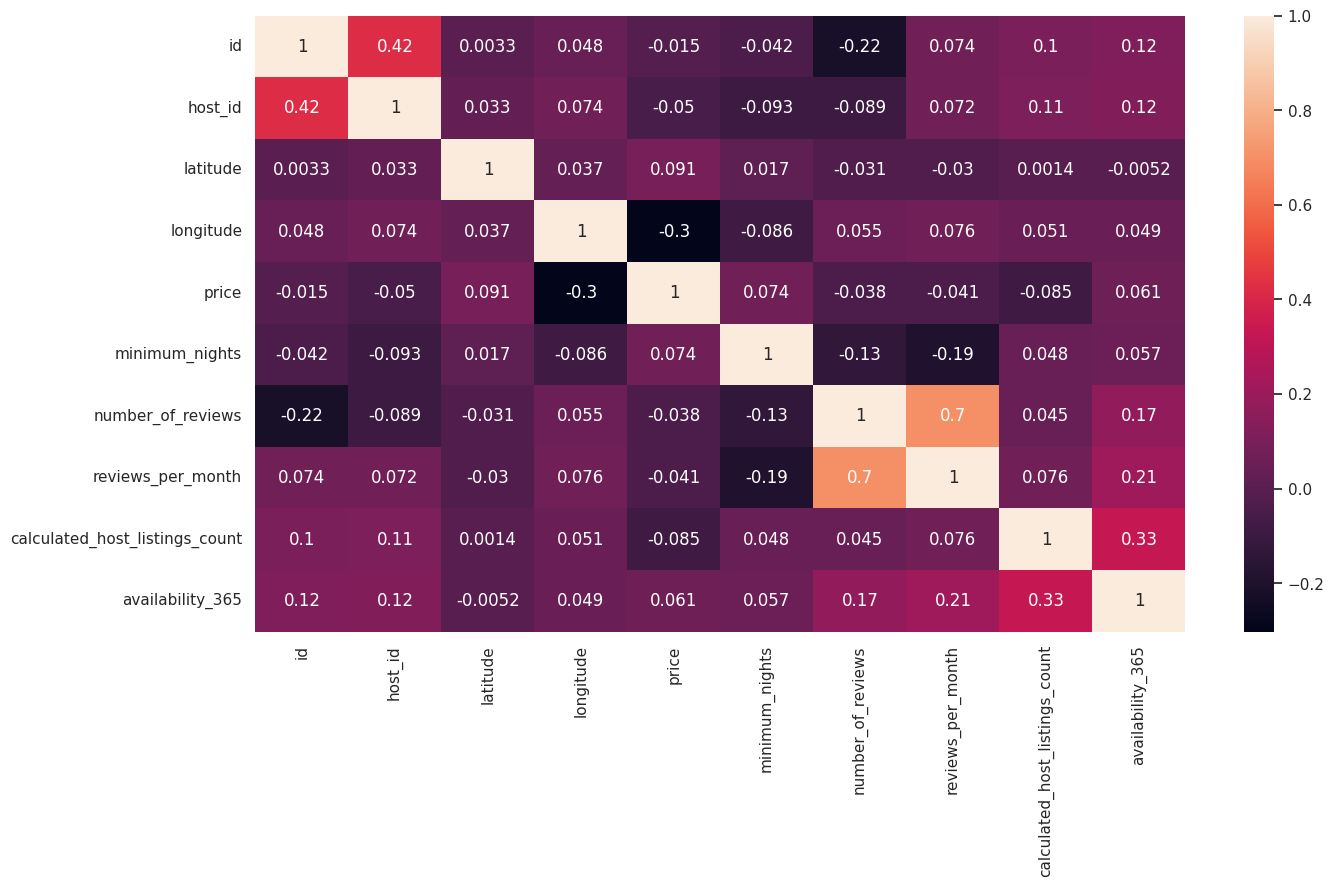

In [83]:
numeric_data =airbnb.select_dtypes(include=['number'])
corr = numeric_data.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
airbnb.columns
plt.show()

In [ ]:
#we should think about encoding the host_name (word bag maybe) and correleating some words against price like studio, cozy ect

## missing values

In [51]:
missing_values_count = airbnb.isna().sum()
display(missing_values_count)
rows_with_missing = airbnb[airbnb.isna().any(axis=1)]


id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

It seems like there are only 4 Columns with missing Values.
last review and reviews per month have the same amount of missing values. So checking if the same rows are missing might be helpful.

In [52]:
#checking if same rows are missing
rows_with_same_na = airbnb[airbnb['last_review'].isna() & airbnb['reviews_per_month'].isna()]
print("Zeilen, in denen beide Spalten NaN-Werte haben:")
display(rows_with_same_na)
rows_with_diff_na = airbnb[airbnb['last_review'].isna() != airbnb['reviews_per_month'].isna()]

if not rows_with_diff_na.empty:
    print("Es gibt Zeilen, in denen nur eine der beiden Spalten NaN-Werte hat:")
    display(rows_with_diff_na)
else:
    print("Keine Zeilen haben abweichende NaN-Werte zwischen den beiden Spalten.")

Zeilen, in denen beide Spalten NaN-Werte haben:


id                                               name   host_id  \
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
19         7750                  Huge 2 BR Upper East  Cental Park     17985   
26         8700  Magnifique Suite au N de Manhattan - vue Cloitres     26394   
36        11452                        Clean and Quiet in Brooklyn      7355   
38        11943                          Country space in the city     45445   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

             host_name neighbourhood_group       neighbourhood  latitude  \
2            Elisabeth           Manhattan              Harlem  40.80902   
19                Sing           Manhattan         East Harlem  40.79685   
26     Claude & Sophie           Manhattan              Inwood  40.86754   
36                  Vt            Brooklyn  Bedford-Stuyvesant  40.68876   
38             Harriet            Brooklyn            Flatbush  40.63702   
...                ...                 ...                 ...       ...   
48890          Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891          Marisol            Brooklyn            Bushwick  40.70184   
48892    Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893              Taz           Manhattan      Hell's Kitchen  40.75751   
48894       Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
2      -73.94190     Private room    150               3                  0   
19     -73.94872  Entire home/apt    190               7                  0   
26     -73.92639     Private room     80               4                  0   
36     -73.94312     Private room     35              60                  0   
38     -73.96327     Private room    150               1                  0   
...          ...              ...    ...             ...                ...   
48890  -73.94995     Private room     70               2                  0   
48891  -73.93317     Private room     40               4                  0   
48892  -73.94867  Entire home/apt    115              10                  0   
48893  -73.99112      Shared room     55               1                  0   
48894  -73.98933     Private room     90               7                  0   

      last_review  reviews_per_month  calculated_host_listings_count  \
2             NaN                NaN                               1   
19            NaN                NaN                               2   
26            NaN                NaN                               1   
36            NaN                NaN                               1   
38            NaN                NaN                               1   
...           ...                ...                             ...   
48890         NaN                NaN                               2   
48891         NaN                NaN                               2   
48892         NaN                NaN                               1   
48893         NaN                NaN                               6   
48894         NaN                NaN                               1   

       availability_365  
2                   365  
19                  249  
26                    0  
36                  365  
38                  365  
...                 ...  
48890                 9  
48891                36  
48892                27  
48893                 2  
48894                23  

[10052 rows 

Keine Zeilen haben abweichende NaN-Werte zwischen den beiden Spalten.


In [53]:
#test if nan values in last_review and reviews_per_month comes from number of reviews = 0
filtered_df = airbnb[airbnb['number_of_reviews'] == 0]
invalid_rows = filtered_df [(filtered_df['last_review'].notna()) | (filtered_df['reviews_per_month'].notna())]
display(invalid_rows)

Empty DataFrame
Columns: [id, name, host_id, host_name, neighbourhood_group, neighbourhood, latitude, longitude, room_type, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count, availability_365]
Index: []

In [54]:
#replacing all nan values in last_Review and reviews_per_month with 0
airbnb['last_review'] = airbnb['last_review'].fillna(0)
airbnb['reviews_per_month'] = airbnb['reviews_per_month'].fillna(0)

In [55]:
print(f"\nFor data: \nData dimensions are: {airbnb.shape[0]} rows and {airbnb.shape[1]} columns")


For data: 
Data dimensions are: 48895 rows and 16 columns


In [77]:
display(airbnb.head())

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0           0   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2               0.00                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [56]:
#dropping host_name because its irrelevant for modell training or business purposes
#(Why should a modell recommend an airbnb just because the owner name is John?) maybe also last review??
airbnb.drop(['host_name'], axis=1, inplace=True)

In [79]:
airbnb.head(5)

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   
3            Brooklyn  Clinton Hill  40.68514  -73.95976  Entire home/apt   
4           Manhattan   East Harlem  40.79851  -73.94399  Entire home/apt   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  2018-10-19               0.21   
1    225               1                 45  2019-05-21               0.38   
2    150               3                  0           0               0.00   
3     89               1                270  2019-07-05               4.64   
4     80              10                  9  2018-11-19               0.10   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365  
3                               1               194  
4                               1                 0

In [57]:
airbnb.isna().sum()

id                                 0
name                              16
host_id                            0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

What do we do with the missing name columns ?

## Outlier

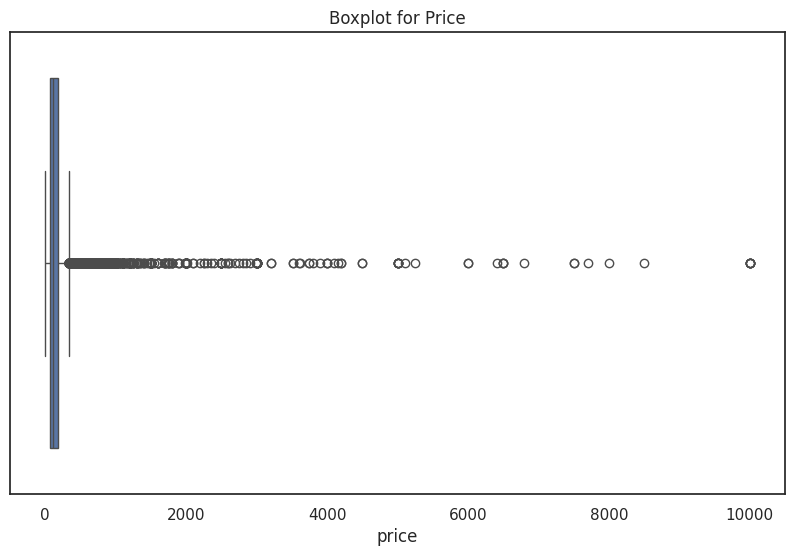

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=airbnb)
plt.title('Boxplot for Price')
plt.show()

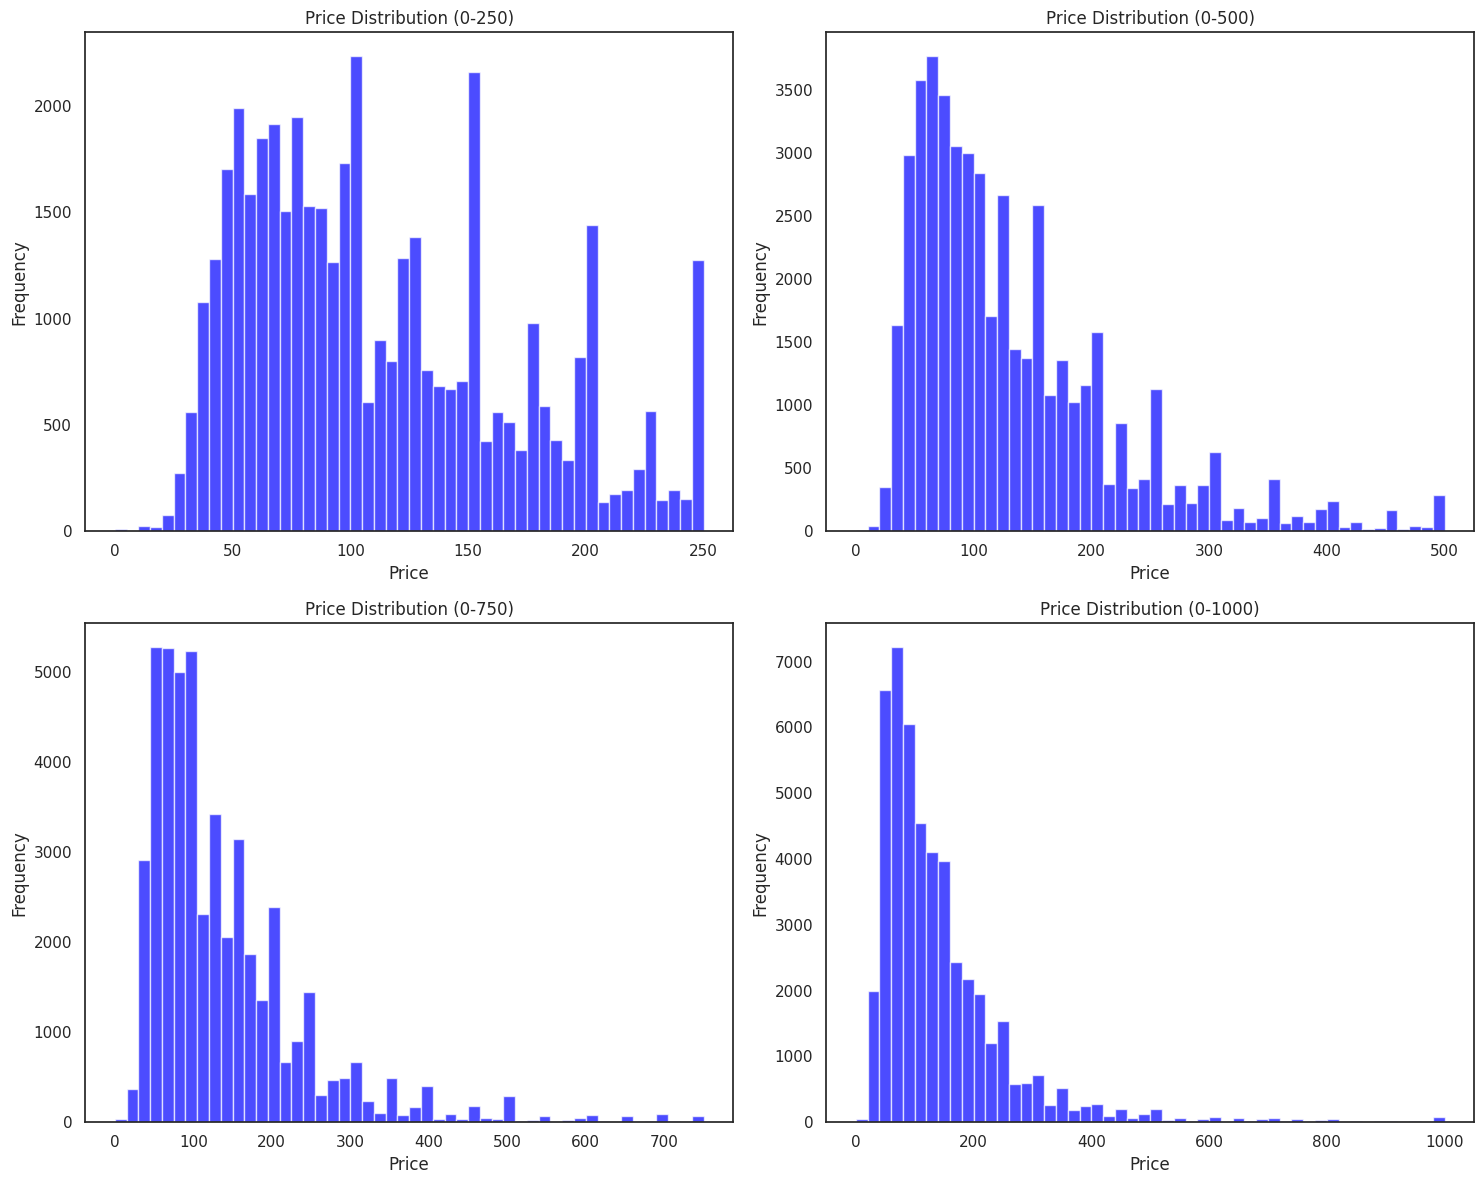

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Define different ranges for zoom levels
zoom_levels = [250, 500, 750, 1000]
titles = ['Price Distribution (0-250)', 'Price Distribution (0-500)', 
          'Price Distribution (0-750)', 'Price Distribution (0-1000)']

# Loop through each subplot and create a histogram with a different range
for ax, zoom, title in zip(axes.flatten(), zoom_levels, titles):
    ax.hist(airbnb['price'], bins=50, range=(0, zoom), color='blue', alpha=0.7)
    ax.set_title(title)
    ax.set_xlabel('Price')
    ax.set_ylabel('Frequency')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

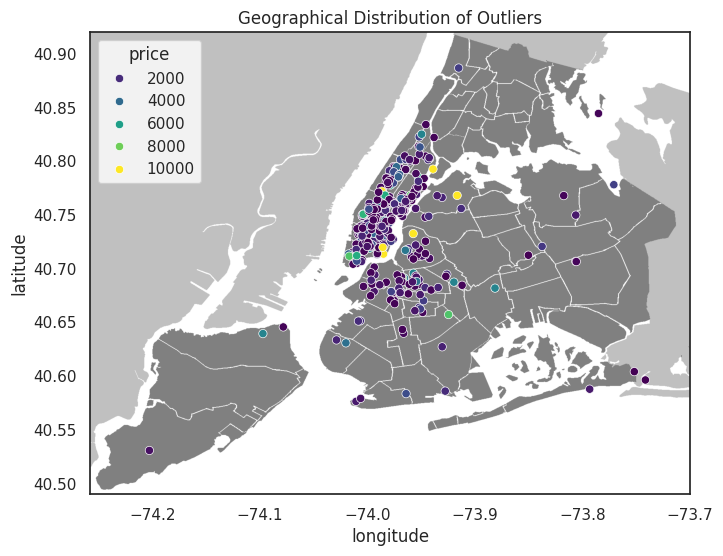

In [61]:
from scipy import stats

z_scores = np.abs(stats.zscore(airbnb['price']))
outliers = airbnb[z_scores > 3]
plt.figure(figsize=(10, 6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
sns.scatterplot(x='longitude', y='latitude', hue='price', data=outliers, palette='viridis')
plt.title('Geographical Distribution of Outliers')
plt.show()

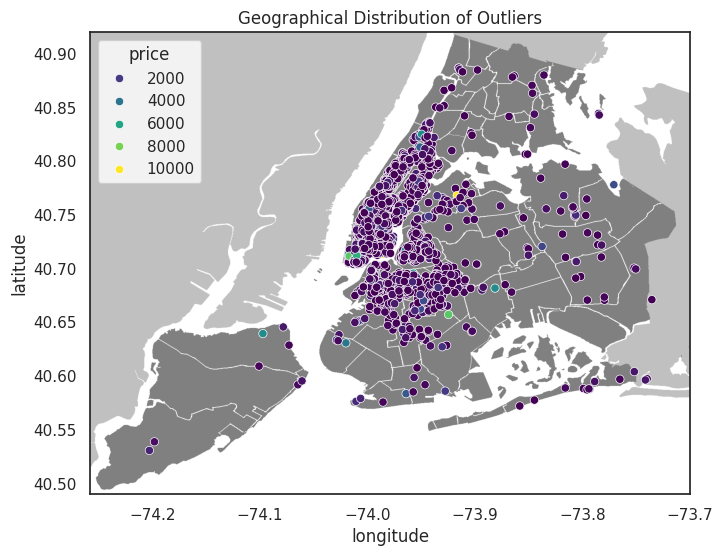

In [62]:
Q1 = airbnb['price'].quantile(0.25)
Q3 = airbnb['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_2 = airbnb[(airbnb['price'] < lower_bound) | (airbnb['price'] > upper_bound)]
plt.figure(figsize=(10, 6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
sns.scatterplot(x='longitude', y='latitude', hue='price', data=outliers_2, palette='viridis')
plt.title('Geographical Distribution of Outliers')
plt.show()

In [100]:
outliers_2['price'].describe()

count     2972.000000
mean       658.775572
std        777.561289
min        335.000000
25%        380.000000
50%        450.000000
75%        650.000000
max      10000.000000
Name: price, dtype: float64

In [101]:
outliers['price'].describe()

count      388.000000
mean      1899.695876
std       1659.006591
min        875.000000
25%       1000.000000
50%       1200.000000
75%       2000.000000
max      10000.000000
Name: price, dtype: float64

In [102]:
airbnb['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

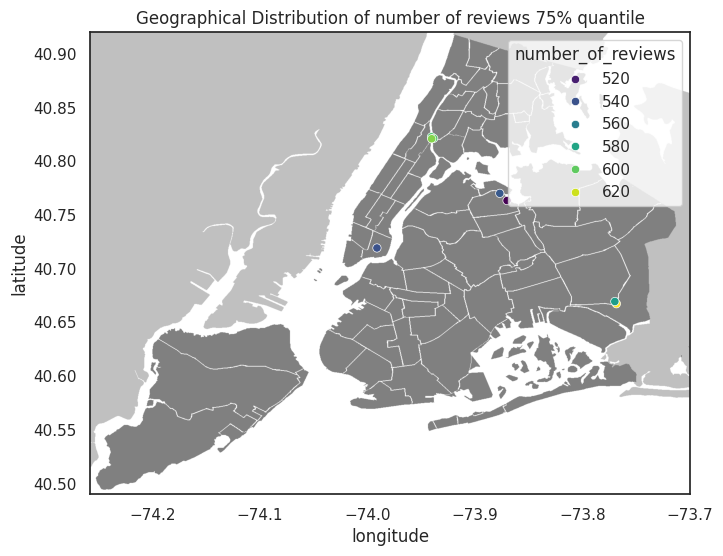

In [134]:
outliers_minimum_nights = airbnb[airbnb['minimum_nights'] > 365]
plt.figure(figsize=(10, 6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
sns.scatterplot(x='longitude', y='latitude', hue='number_of_reviews', data=outliers_reviews, palette='viridis')
plt.title('Geographical Distribution of number of reviews 75% quantile')
plt.show()

In [ ]:
#what are we doing with theese listings ?

In [135]:
outliers_reviews= airbnb[airbnb['number_of_reviews'] >700]
outliers_reviews['number_of_reviews'].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: number_of_reviews, dtype: float64

In [137]:
airbnb['number_of_reviews'].describe()

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
25%          1.000000
50%          5.000000
75%         24.000000
max        629.000000
Name: number_of_reviews, dtype: float64

we have 10052.0 without any review and the 75%quantile starts at 25 with 11930.000000

In [116]:
# Calculate an estimated number of bookings in a year from reviews per month
airbnb['estimated_booking_potential'] = airbnb['reviews_per_month'] * 12

# Cap the booking potential based on the 'availability_365' to ensure it does not exceed the available days
airbnb['estimated_booking_potential'] = airbnb[['estimated_booking_potential', 'availability_365']].min(axis=1)

# Display a sample of the new column to verify
display(airbnb[['availability_365', 'reviews_per_month', 'number_of_reviews', 'estimated_booking_potential']].head())
max_booking_score = airbnb[airbnb['estimated_booking_potential'] == 299.00]

# Display the filtered data
display(max_booking_score)

availability_365  reviews_per_month  number_of_reviews  \
0               365               0.21                  9   
1               355               0.38                 45   
2               365               0.00                  0   
3               194               4.64                270   
4                 0               0.10                  9   

   estimated_booking_potential  
0                         2.52  
1                         4.56  
2                         0.00  
3                        55.68  
4                         0.00

id                                               name    host_id  \
42075  32678719  Enjoy great views of the City in our Deluxe Room!  244361589   
42076  32678720           Great Room in the heart of Times Square!  244361589   

      neighbourhood_group     neighbourhood  latitude  longitude  \
42075           Manhattan  Theater District  40.75918  -73.98801   
42076           Manhattan  Theater District  40.75828  -73.98876   

          room_type  price  minimum_nights  number_of_reviews last_review  \
42075  Private room    100               1                156  2019-07-07   
42076  Private room    199               1                 82  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  \
42075              58.50                               9               299   
42076              27.95                               9               299   

       price_log  estimated_booking_potential  
42075   4.615121                        299.0  
42076   5.298317                        299.0

In [63]:
def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

num_cols = airbnb.select_dtypes(include=['number']).columns.tolist()

In [64]:
#going through all columns to see if outlier True or False
for col in num_cols:
    print(col, check_outlier(airbnb, col))

id False
host_id False
latitude False
longitude True
price True
minimum_nights True
number_of_reviews True
reviews_per_month True
calculated_host_listings_count True
availability_365 False


## Visualisations

In [8]:
airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

 - starting to visualise and analyse each column from left to right.
 - but first visualising each airbnb on an interactive map
 - and all distributions of numerical variables
 - then continuing with first column name

In [ ]:
pip install folium


In [34]:
import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import HeatMap

### Geographic visualisations on interactive map

In [32]:
Long=-73.80
Lat=40.80

locations = list(zip(airbnb.latitude, airbnb.longitude))

map1 = folium.Map(location=[Lat,Long], zoom_start=9)

FastMarkerCluster(data=locations).add_to(map1)

map1

In [35]:
m=folium.Map([40.7128,-74.0060],zoom_start=11)

HeatMap(airbnb[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)

display(m)

### Analysis of numerical variables

In [38]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)


count    4.889500e+04
mean     1.901714e+07
std      1.098311e+07
min      2.539000e+03
5%       1.222383e+06
10%      3.496066e+06
20%      7.515052e+06
30%      1.158800e+07
40%      1.564268e+07
50%      1.967728e+07
60%      2.250310e+07
70%      2.714074e+07
80%      3.053027e+07
90%      3.399094e+07
95%      3.525910e+07
99%      3.623888e+07
max      3.648724e+07
Name: id, dtype: float64


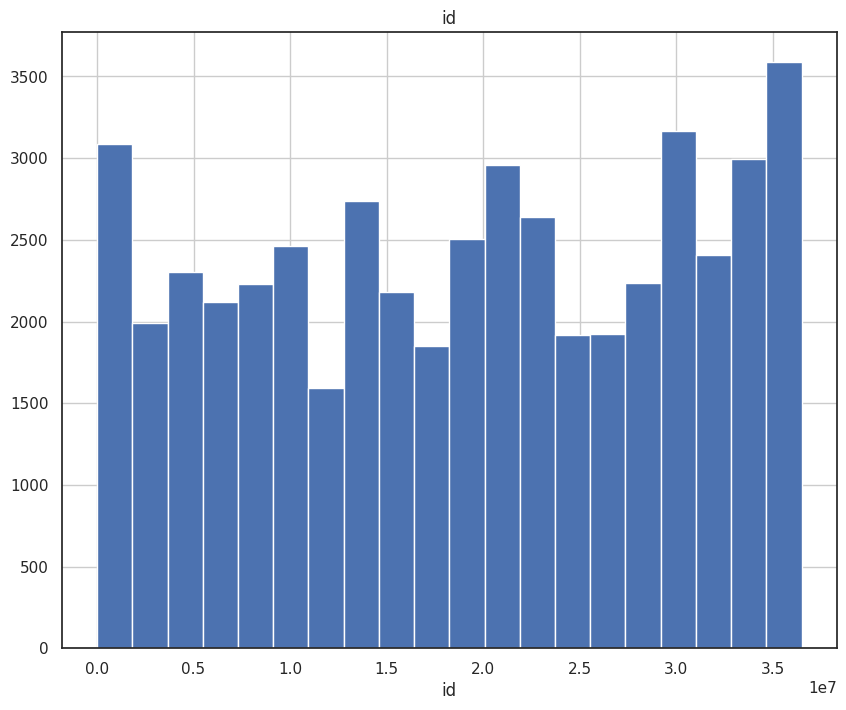

count    4.889500e+04
mean     6.762001e+07
std      7.861097e+07
min      2.438000e+03
5%       8.155641e+05
10%      2.027013e+06
20%      5.434441e+06
30%      1.072118e+07
40%      1.954412e+07
50%      3.079382e+07
60%      4.868555e+07
70%      8.082452e+07
80%      1.371296e+08
90%      2.128114e+08
95%      2.417646e+08
99%      2.677118e+08
max      2.743213e+08
Name: host_id, dtype: float64


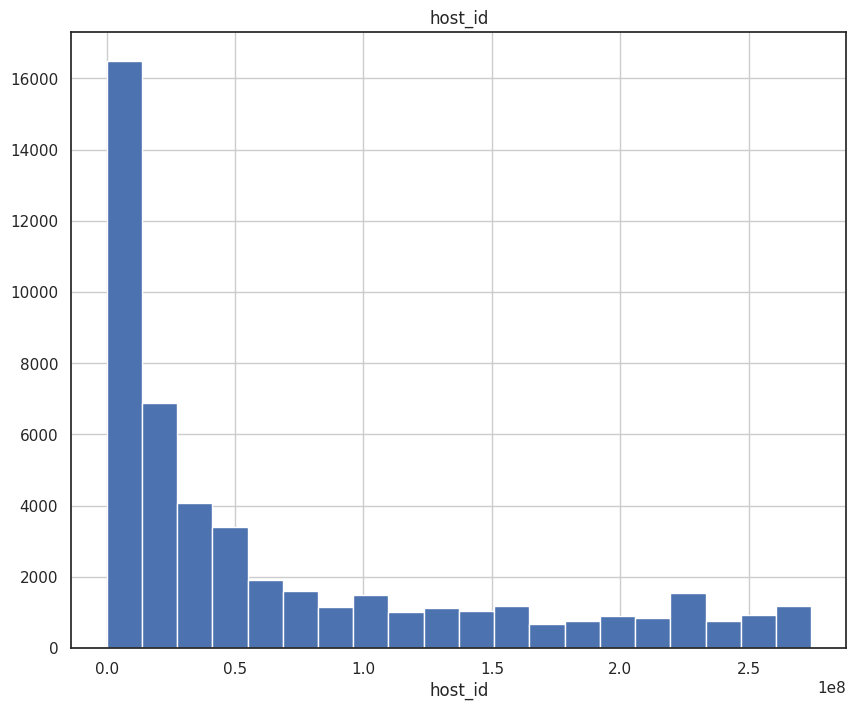

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
5%          40.646114
10%         40.667990
20%         40.684828
30%         40.696570
40%         40.711706
50%         40.723070
60%         40.738420
70%         40.756030
80%         40.770982
90%         40.804890
95%         40.825643
99%         40.864661
max         40.913060
Name: latitude, dtype: float64


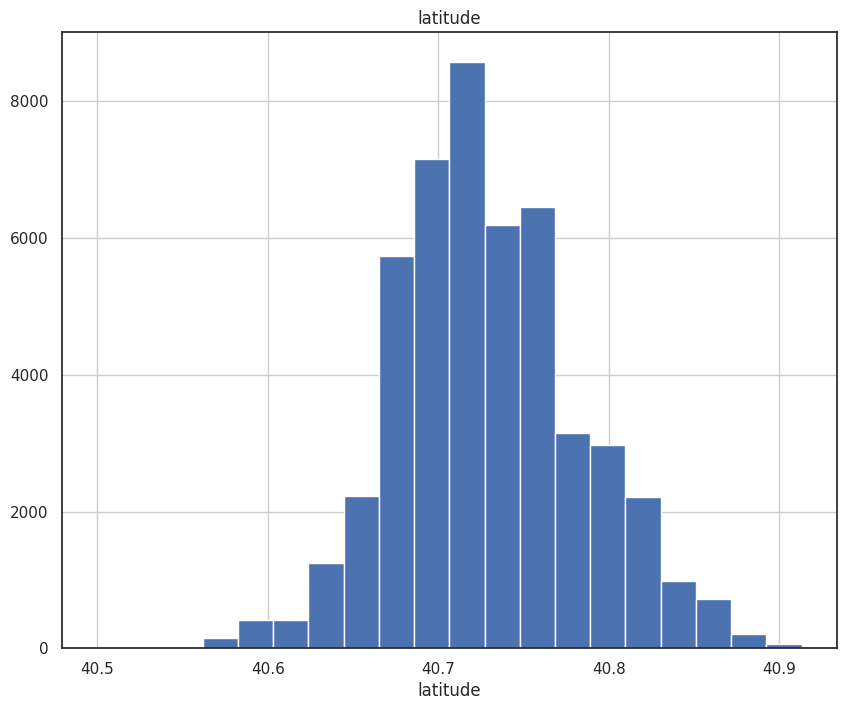

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
5%         -74.003880
10%        -73.996690
20%        -73.987110
30%        -73.978570
40%        -73.964180
50%        -73.955680
60%        -73.948890
70%        -73.941290
80%        -73.927698
90%        -73.907810
95%        -73.865771
99%        -73.776920
max        -73.712990
Name: longitude, dtype: float64


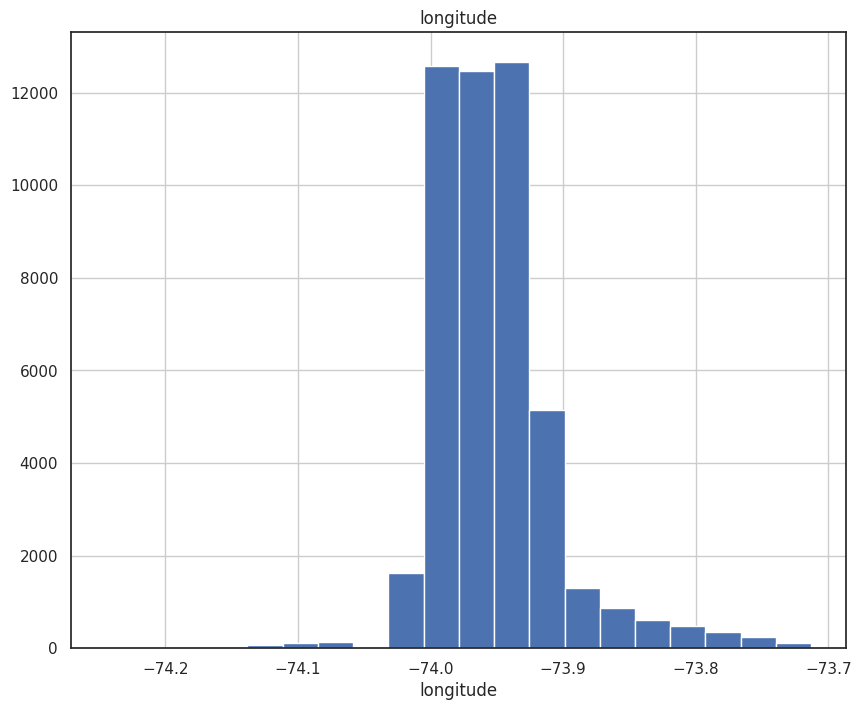

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
5%          40.000000
10%         49.000000
20%         60.000000
30%         75.000000
40%         90.000000
50%        106.000000
60%        130.000000
70%        155.000000
80%        200.000000
90%        269.000000
95%        355.000000
99%        799.000000
max      10000.000000
Name: price, dtype: float64


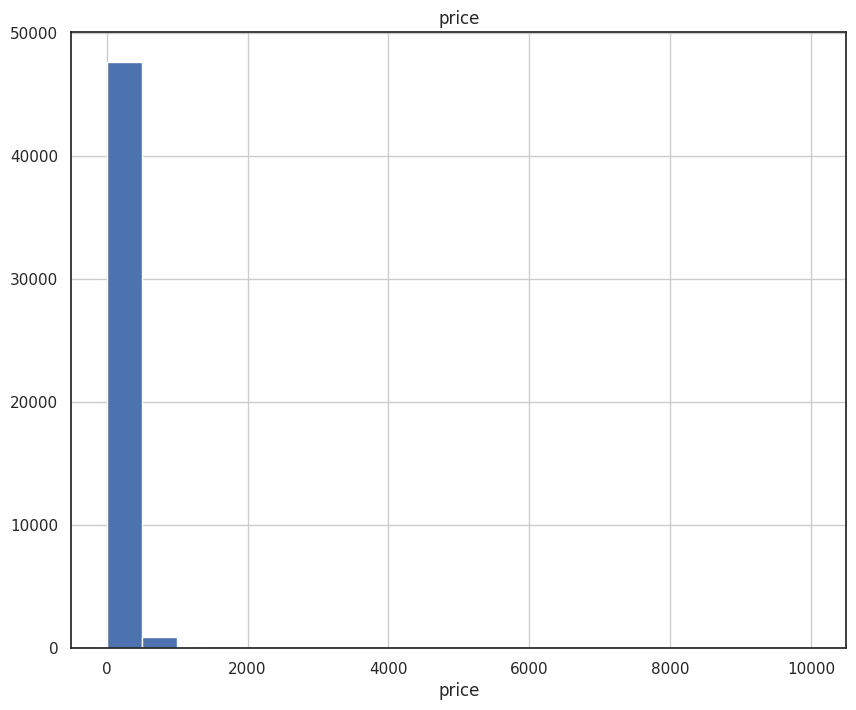

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          2.000000
40%          2.000000
50%          3.000000
60%          3.000000
70%          4.000000
80%          6.000000
90%         28.000000
95%         30.000000
99%         45.000000
max       1250.000000
Name: minimum_nights, dtype: float64


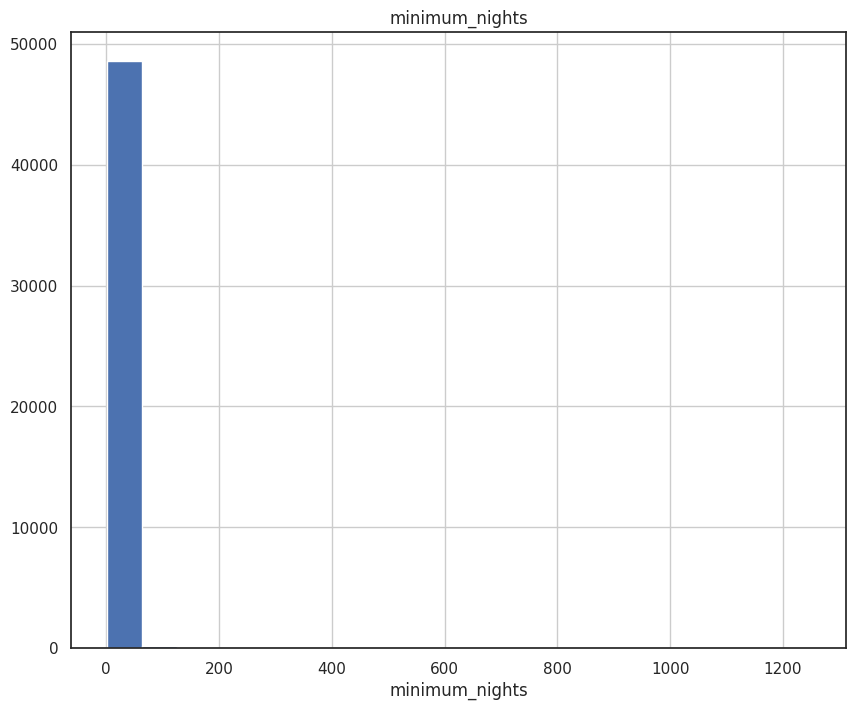

count    48895.000000
mean        23.274466
std         44.550582
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          1.000000
40%          3.000000
50%          5.000000
60%          9.000000
70%         17.000000
80%         33.000000
90%         70.000000
95%        114.000000
99%        214.000000
max        629.000000
Name: number_of_reviews, dtype: float64


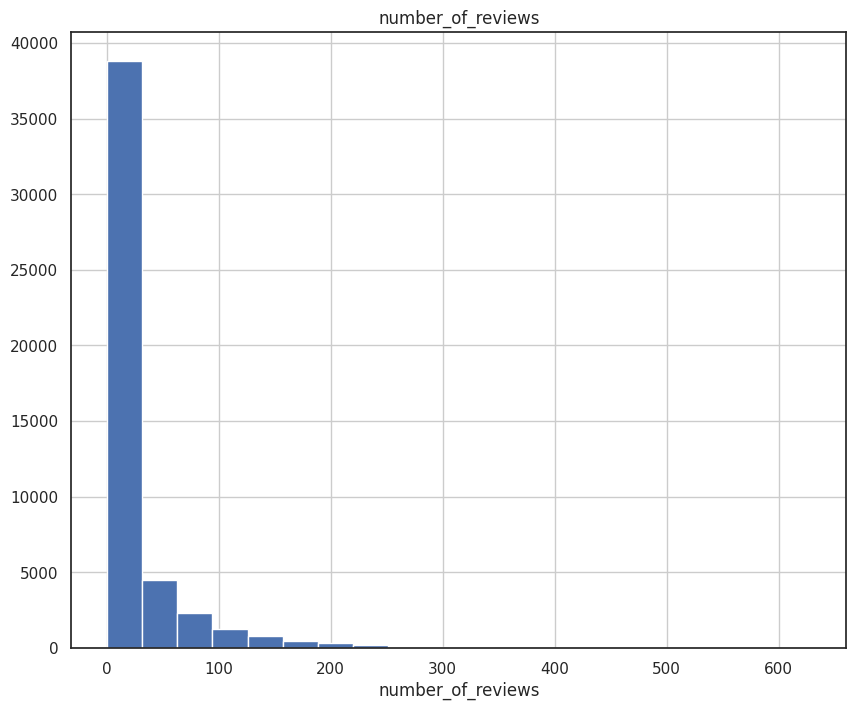

count    38843.000000
mean         1.373221
std          1.680442
min          0.010000
5%           0.040000
10%          0.060000
20%          0.140000
30%          0.260000
40%          0.430000
50%          0.720000
60%          1.060000
70%          1.690000
80%          2.470000
90%          3.630000
95%          4.640000
99%          7.195800
max         58.500000
Name: reviews_per_month, dtype: float64


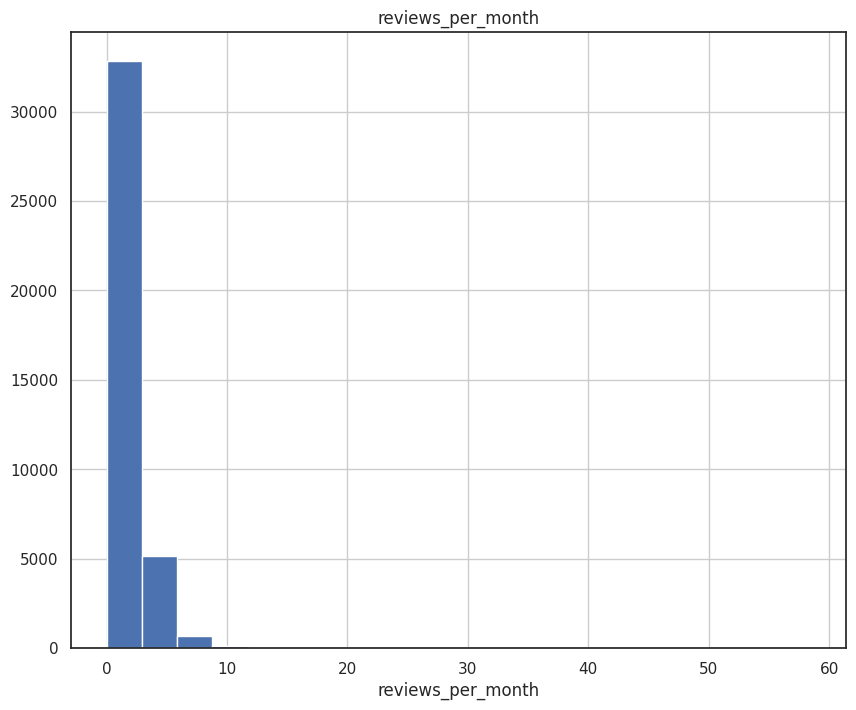

count    48895.000000
mean         7.143982
std         32.952519
min          1.000000
5%           1.000000
10%          1.000000
20%          1.000000
30%          1.000000
40%          1.000000
50%          1.000000
60%          1.000000
70%          2.000000
80%          3.000000
90%          5.000000
95%         15.000000
99%        232.000000
max        327.000000
Name: calculated_host_listings_count, dtype: float64


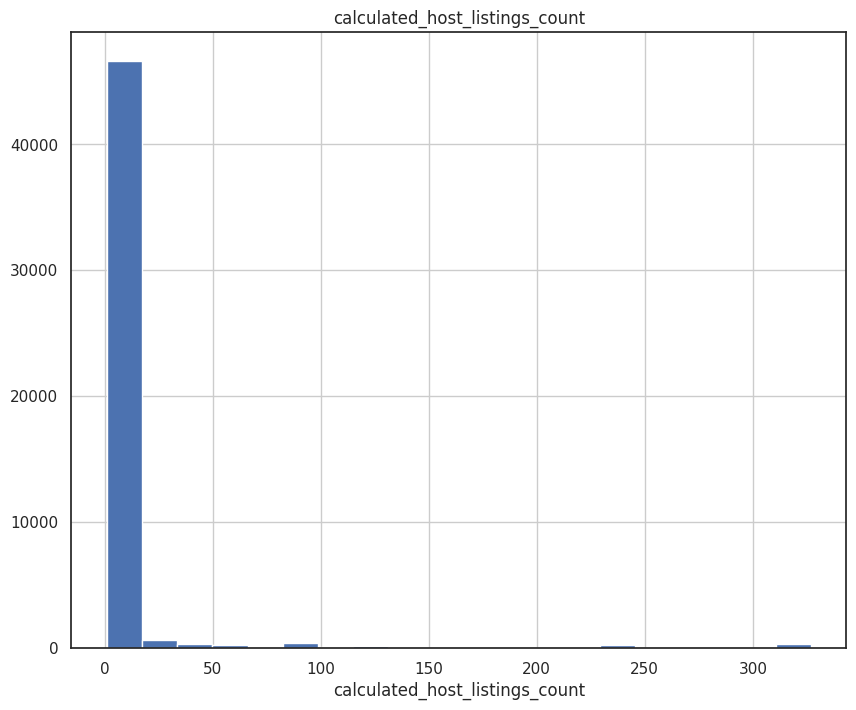

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          8.000000
50%         45.000000
60%         92.000000
70%        179.000000
80%        272.000000
90%        337.000000
95%        359.000000
99%        365.000000
max        365.000000
Name: availability_365, dtype: float64


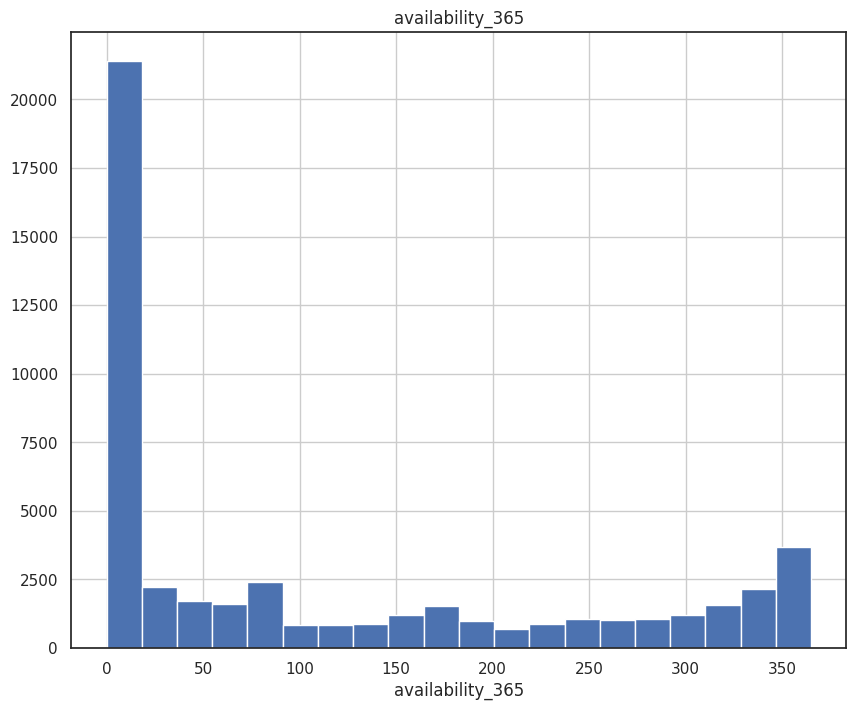

In [39]:
for col in num_cols:
    num_summary(airbnb, col, plot=True)

### Name

In [9]:
#Creating two lists, one for the names of the words and one for the count. getting the names as strings from the column name

#list for names
_names_ = []

#looping through column and getting all strings
for name in airbnb.name:
    _names_.append(name)

#function that split the strings into separate words
def split_name(name):
    spl= str(name).split()
    return spl
#list for name counting
_names_for_count_ = []

for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [10]:
from collections import Counter
_top_25_ = Counter(_names_for_count_).most_common()
_top_25_ = _top_25_[0:25]

In [11]:
sub_w=pd.DataFrame(_top_25_)
sub_w.rename(columns={0:'Words',1:'Count'}, inplace=True)

/tmp/ipykernel_3203/2686499551.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)


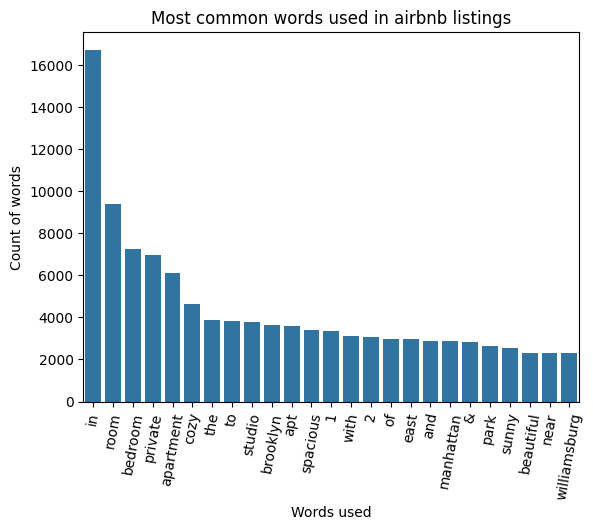

In [12]:
viz_1 = sns.barplot(x='Words',y='Count',data=sub_w)
viz_1.set_title('Most common words used in airbnb listings')
viz_1.set_ylabel('Count of words')
viz_1.set_xlabel('Words used')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=80)
plt.show(viz_1)

in by far the most used word but not really interesting for our analysis
since its not really a signal word. So maybe should be excluded for modell training.
williamsbrburg is the only neighbour word that is in the top 25. So maybe we should look into that. Cozy is the most used adjective, followed by spacious.
In general very easy words are being used so its easier to find on airbnb. And a lot of describing words

### Host-id

In [13]:
#Exploring column by column starting from left to right
top_host = airbnb.host_id.value_counts().head(10)
display(top_host)

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
1475015       52
Name: count, dtype: int64

In [14]:
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

np.int64(327)

In [15]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style('white')

In [16]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

P_Count  count
0  219517861    327
1  107434423    232
2   30283594    121
3  137358866    103
4   16098958     96
5   12243051     96
6   61391963     91
7   22541573     87
8  200380610     65
9    1475015     52

/tmp/ipykernel_3203/1205253842.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_2=sns.barplot(x="P_Count", y="count", data=top_host_df,
/tmp/ipykernel_3203/1205253842.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  viz_2.set_xticklabels(viz_2.get_xticklabels(), rotation=45)


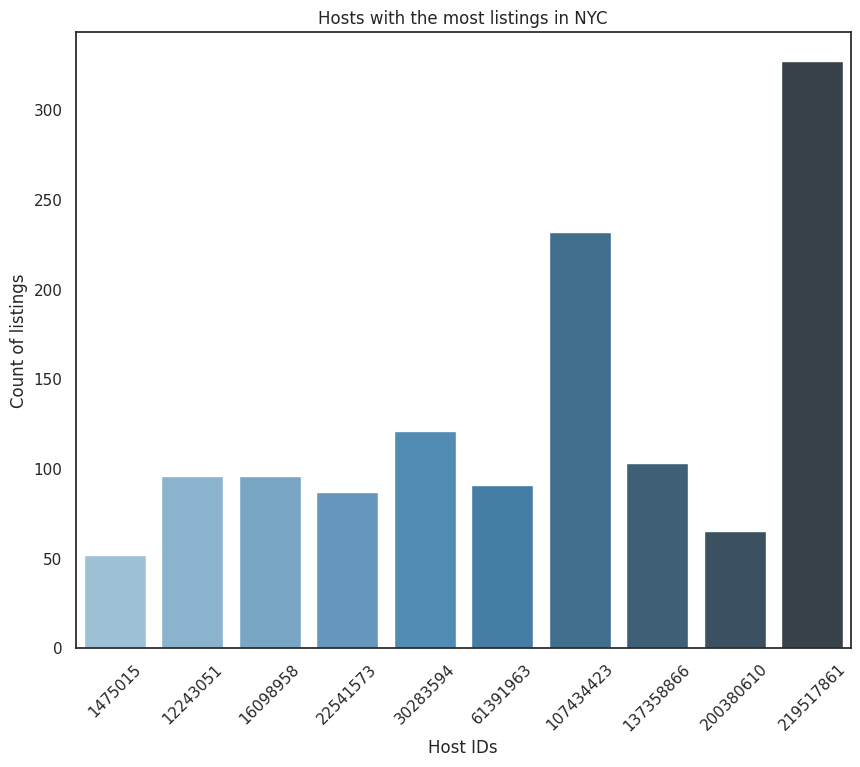

In [27]:
viz_2=sns.barplot(x="P_Count", y="count", data=top_host_df,
                 palette='Blues_d')
viz_2.set_title('Hosts with the most listings in NYC')
viz_2.set_ylabel('Count of listings')
viz_2.set_xlabel('Host IDs')
viz_2.set_xticklabels(viz_2.get_xticklabels(), rotation=45)
plt.show()

In [17]:
unique_host_ids = top_host_df['P_Count'].unique()

for host_id in unique_host_ids:
    # Filter the listings for the current host_id
    host_listings = airbnb[airbnb['host_id'] == host_id]
    
    # Check if all listings are in Manhattan
    if (host_listings['neighbourhood_group'] == 'Manhattan').all():
        print(f"Host {host_id} has only listings in Manhattan.")
    else:
        unique_neighbourhoods = host_listings['neighbourhood_group'].unique()
        print(f"Host {host_id} has listings in other neighbourhood groups: {unique_neighbourhoods}")


Host 219517861 has only listings in Manhattan.
Host 107434423 has listings in other neighbourhood groups: ['Manhattan' 'Brooklyn']
Host 30283594 has only listings in Manhattan.
Host 137358866 has listings in other neighbourhood groups: ['Manhattan' 'Queens' 'Brooklyn']
Host 16098958 has only listings in Manhattan.
Host 12243051 has only listings in Manhattan.
Host 61391963 has only listings in Manhattan.
Host 22541573 has listings in other neighbourhood groups: ['Manhattan' 'Brooklyn']
Host 200380610 has only listings in Manhattan.
Host 1475015 has only listings in Manhattan.


### Neighbourhoods and neighbourhoodgroups

In [18]:
#neighbourhoods?
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [19]:
len(airbnb.neighbourhood.unique())

221

In [20]:
#room_types
airbnb.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [21]:
len(airbnb.room_type.unique())

3

In [22]:
#filtering neighbourhood by prices
#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [23]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min         0.0        0.0     10.0           13.0     0.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

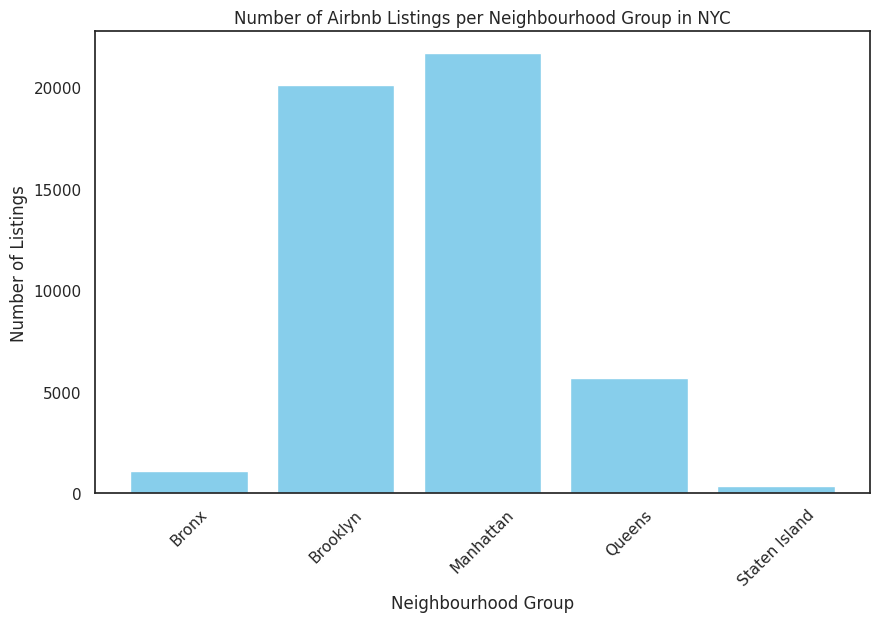

In [24]:
neighborhood_counts = airbnb.groupby('neighbourhood_group').size().reset_index(name='counts')
plt.figure(figsize=(10, 6))
plt.bar(neighborhood_counts['neighbourhood_group'], neighborhood_counts['counts'], color='skyblue')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.title('Number of Airbnb Listings per Neighbourhood Group in NYC')
plt.xticks(rotation=45)
plt.show()


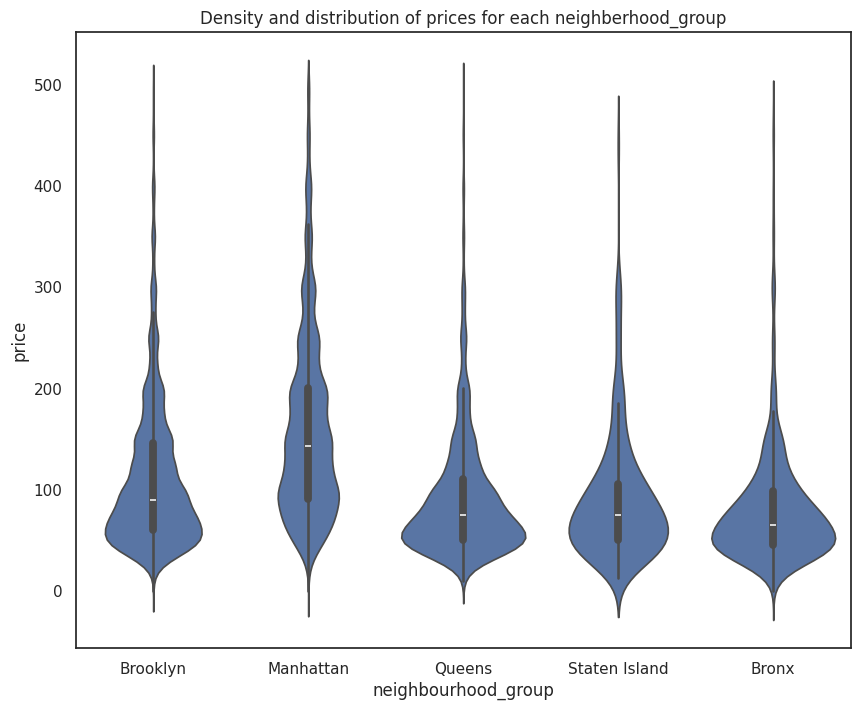

In [26]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_3=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_3.set_title('Density and distribution of prices for each neighberhood_group')
plt.show(viz_3)

some statistical observations: first manhattan has the highest average with around 150.
Followed by brooklyn with around 90.
Bronx is the cheapest with around 70 and queens,staten island with around the same amount. Distribution as excpected

In [28]:
#finding more about neighbourhood but only top 10 since 221 is way too many too concentrate on during exploration
airbnb.neighbourhood.value_counts().head(10)

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: count, dtype: int64

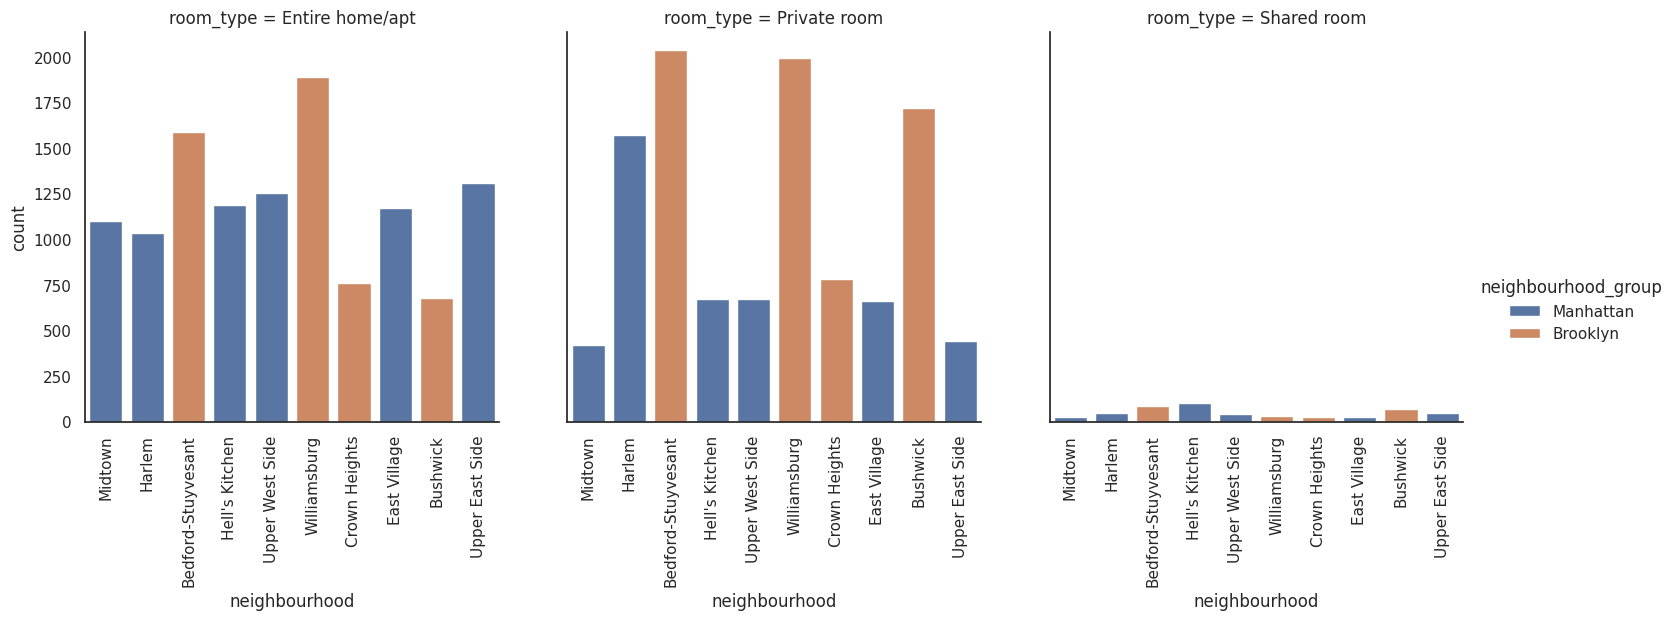

In [29]:
#now combining with room_type

sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot
viz_4 = sns.catplot(x='neighbourhood',hue = 'neighbourhood_group', col ='room_type', data=sub_7,kind='count')
viz_4.set_xticklabels(rotation=90)
plt.show(viz_4)

Room type shared room is the most less frequent one while private room and entire home seems to be queally distributed.
Bedford-stuyvesant and williamsburg and bushwick in the first two categories the most listings
whereas in shared room hells kitchen has the most listings. and onyl manhattan and brooklyn are shown which makes sense since these are probably
both very popular toursit destinations.
next we look what we can do with longitude and latitude columns

/tmp/ipykernel_3203/511993500.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  viz_5 = sns.boxplot(data=airbnb,x='neighbourhood_group',y='availability_365',palette='plasma')


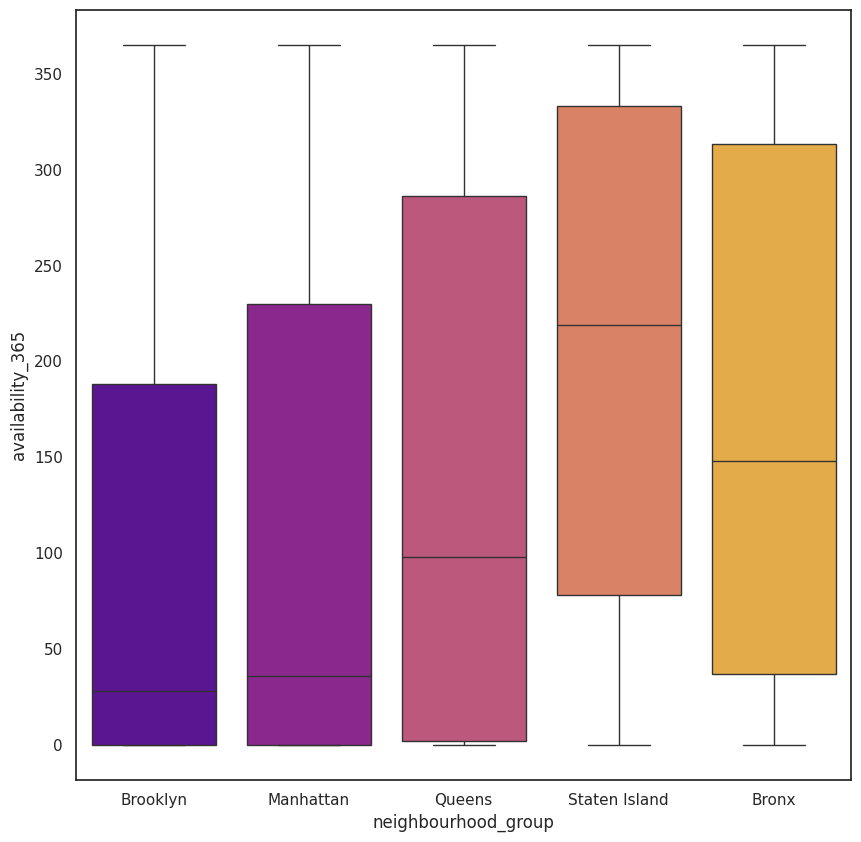

In [70]:
#Relationship between neighbourgroup and empty or not
plt.figure(figsize=(10,10))
viz_5 = sns.boxplot(data=airbnb,x='neighbourhood_group',y='availability_365',palette='plasma')
plt.show(viz_5)

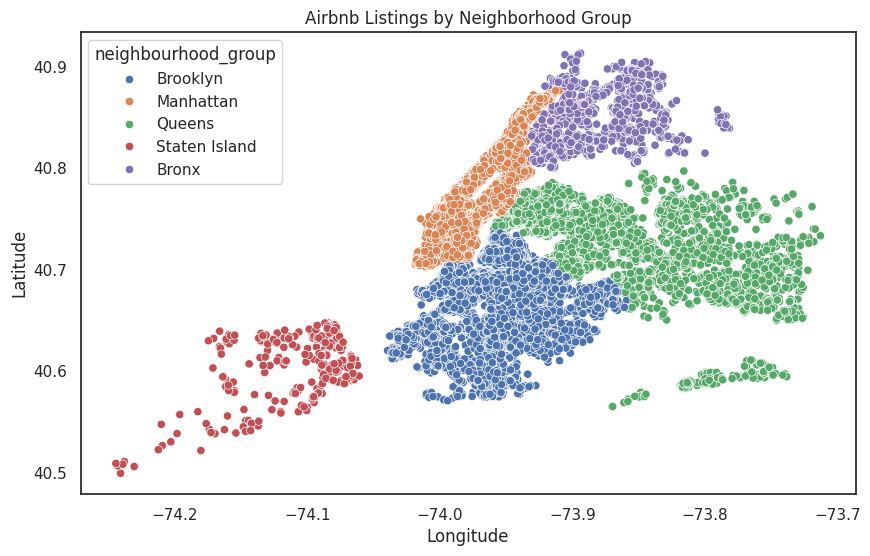

In [71]:
plt.figure(figsize=(10, 6))
viz_6 = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=airbnb)
plt.title("Airbnb Listings by Neighborhood Group")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show(viz_6)

In [66]:
import urllib.request
from PIL import Image
# URL for NYC map image
url = 'https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG'

# Download the image from URL
i = urllib.request.urlopen(url)

# Open image using PIL
image = Image.open(i)

# Convert image to numpy array
nyc_img = np.array(image)

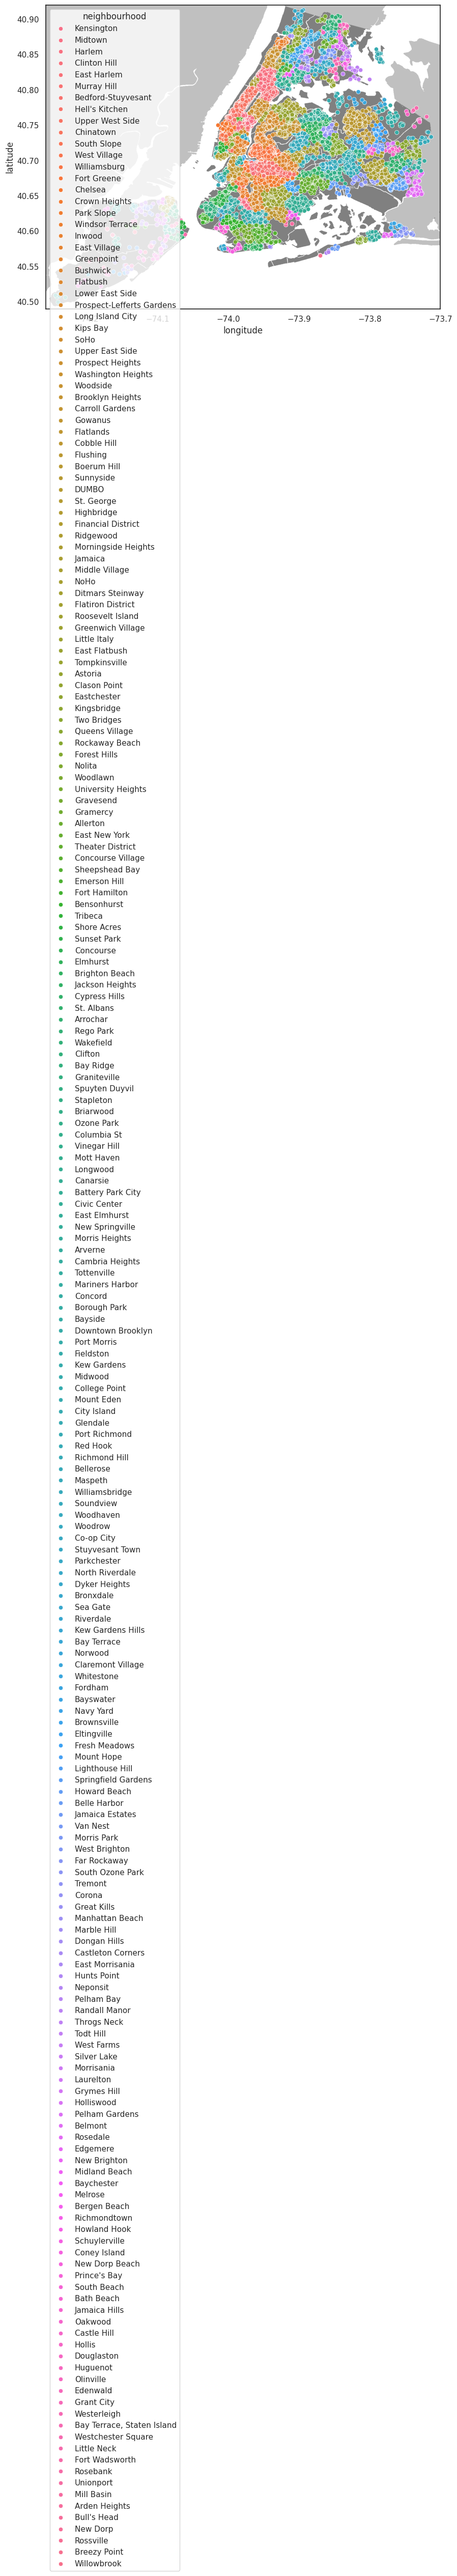

In [72]:
plt.figure(figsize=(10,8))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
viz_7 = sns.scatterplot(x='longitude',y='latitude',data=airbnb,hue='neighbourhood')
plt.show(viz_7)

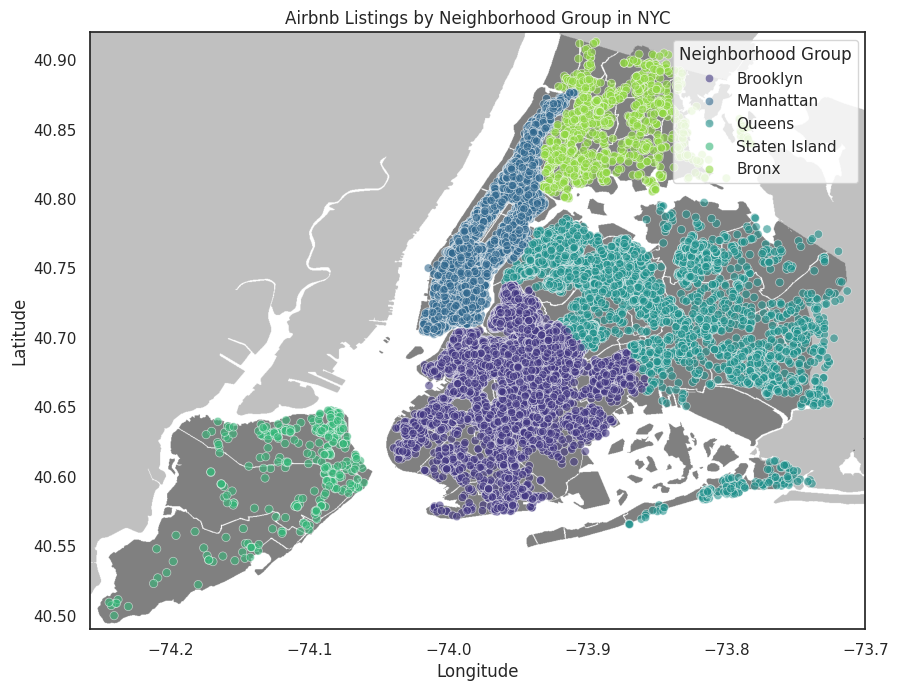

In [73]:
plt.figure(figsize=(10, 8))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
viz_8 = sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=airbnb, palette='viridis', alpha=0.6)
plt.title("Airbnb Listings by Neighborhood Group in NYC")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Neighborhood Group", loc='upper right')
plt.show(viz_8)


### room_type

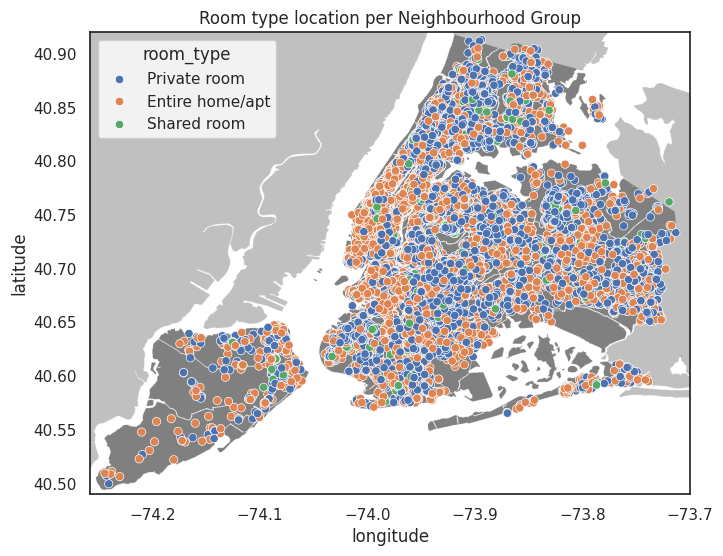

In [74]:
title = 'Room type location per Neighbourhood Group'
plt.figure(figsize=(10,6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
viz_9 = sns.scatterplot(x='longitude', y='latitude', hue='room_type', data=airbnb).set_title(title)
plt.show(viz_9)

### price

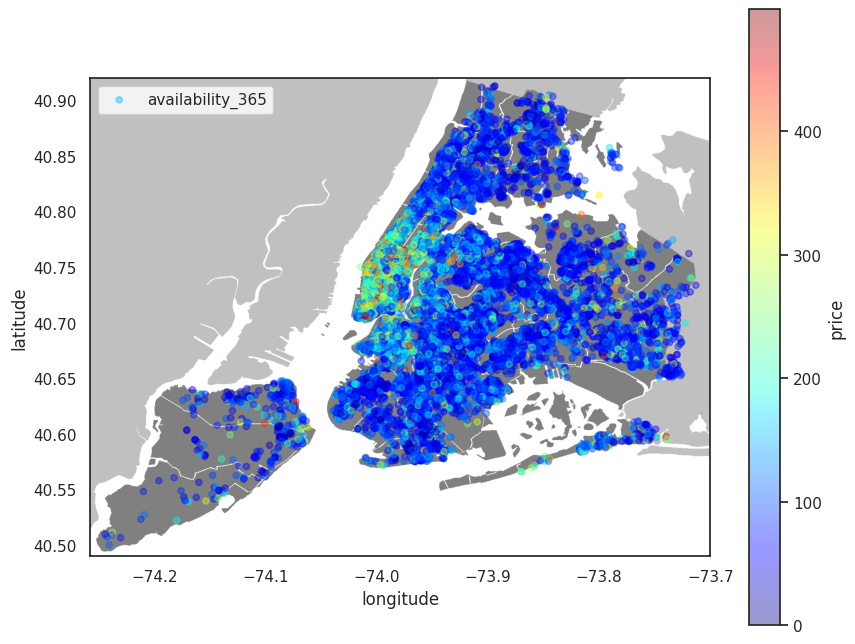

In [78]:
plt.figure(figsize=(10,8))
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

### number of reviews

In [176]:
#next up is number of reviews
#top 10 most reviewed listings

top_reviewed_listings = airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

id                                               name   host_id  \
11759   9145202                            Room near JFK Queen Bed  47621202   
2031     903972                         Great Bedroom in Manhattan   4734398   
2030     903947                     Beautiful Bedroom in Manhattan   4734398   
2015     891117                       Private Bedroom in Manhattan   4734398   
13495  10101135                            Room Near JFK Twin Beds  47621202   
10623   8168619                  Steps away from Laguardia airport  37312959   
1879     834190           Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  16276632  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870    3474320                 Private brownstone studio Brooklyn  12949460   
471      166172                    LG Private Room/Family Friendly    792159   

      neighbourhood_group    neighbourhood  latitude  longitude  \
11759              Queens          Jamaica  40.66730  -73.76831   
2031            Manhattan           Harlem  40.82085  -73.94025   
2030            Manhattan           Harlem  40.82124  -73.93838   
2015            Manhattan           Harlem  40.82264  -73.94041   
13495              Queens          Jamaica  40.66939  -73.76975   
10623              Queens    East Elmhurst  40.77006  -73.87683   
1879            Manhattan  Lower East Side  40.71921  -73.99116   
20403              Queens    East Elmhurst  40.76335  -73.87007   
4870             Brooklyn       Park Slope  40.67926  -73.97711   
471              Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews last_review  \
11759     Private room     47               1                629  2019-07-05   
2031      Private room     49               1                607  2019-06-21   
2030      Private room     49               1                597  2019-06-23   
2015      Private room     49               1                594  2019-06-15   
13495     Private room     47               1                576  2019-06-27   
10623     Private room     46               1                543  2019-07-01   
1879      Private room     99               2                540  2019-07-06   
20403     Private room     48               1                510  2019-07-06   
4870   Entire home/apt    160               1                488  2019-07-01   
471       Private room     60               3                480  2019-07-07   

       reviews_per_month  calculated_host_listings_count  availability_365  \
11759              14.58                               2               333   
2031                7.75                               3               293   
2030                7.72                               3               342   
2015                7.57                               3               339   
13495              13.40                               2               173   
10623              11.59                               5               163   
1879                6.95                               1               179   
20403              16.22                               5               341   
4870                8.14                               1               269   
471                 6.70                               1                 0   

       price_log  estimated_booking_potential  
11759   3.871201                       174.96  
2031    3.912023                        93.00  
2030    3.912023                        92.64  
2015    3.912023                        90.84  
13495   3.871201                       160.80  
10623   3.850148                       139.08  
1879    4.605170                        83.40  
20403   3.891820                       194.64  
4870    5.081404                        97.68  
471     4.110874                         0.00

In [32]:
price_avrg = top_reviewed_listings.price.mean()
print('average price per night:{}'.format(price_avrg))

average price per night:65.4


 - most reviewed listings on airbnb in newyork have an average price of 65,4$,
 - while 9/10 are private rooms. 7/10 below 50$,
   one outlier with 160$

### Minimum nights

Minimum nights per neighbourhood group

/tmp/ipykernel_3203/905786644.py:3: FutureWarning: The provided callable <function median at 0x7d3af49558a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  min_nights = airbnb.groupby(['neighbourhood_group'])['minimum_nights'].aggregate(np.median).reset_index()


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

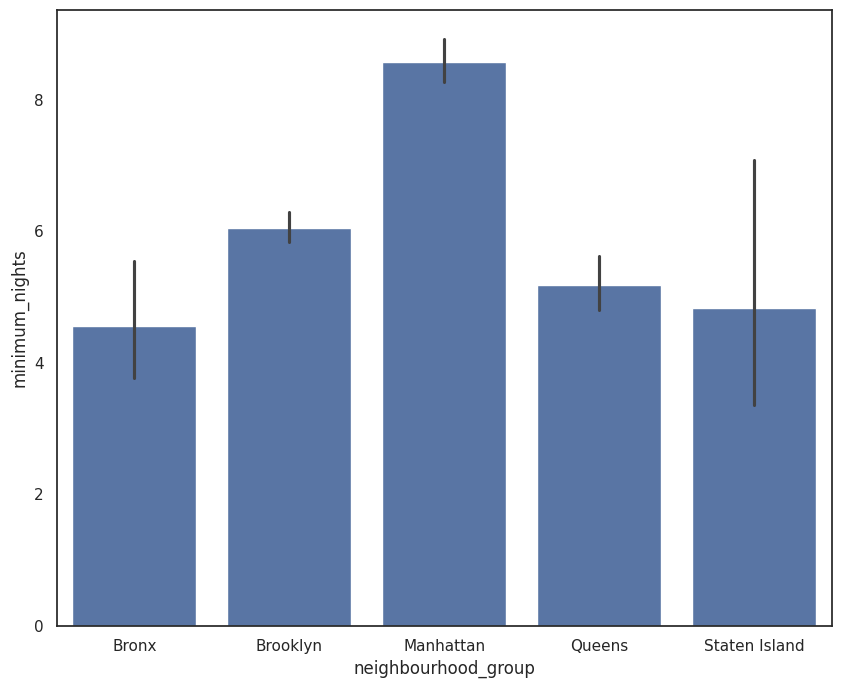

In [85]:
plt.figure(figsize=(10,8))

min_nights = airbnb.groupby(['neighbourhood_group'])['minimum_nights'].aggregate(np.median).reset_index()


sns.barplot(x='neighbourhood_group',y='minimum_nights',data=airbnb,order=min_nights['neighbourhood_group'])
plt.show()


### Availability_365

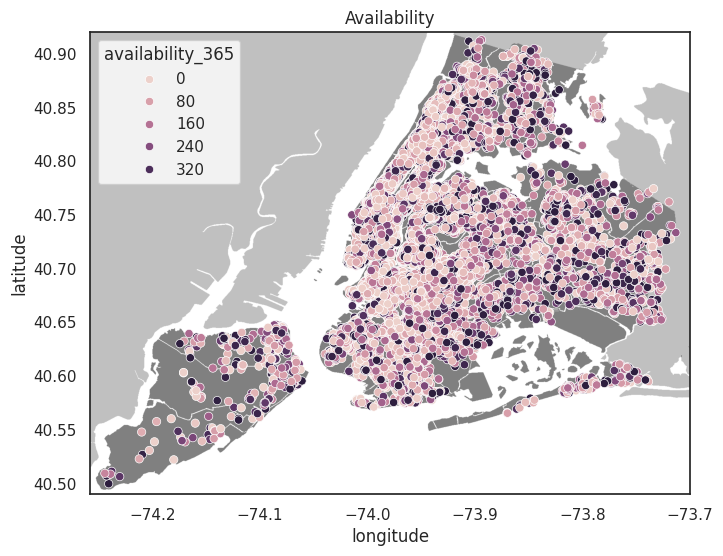

In [77]:
title = 'Availability'
plt.figure(figsize=(10,6))
plt.imshow(nyc_img, zorder=0, extent=[-74.258, -73.7, 40.49, 40.92])
viz_10 = sns.scatterplot(x='longitude', y='latitude', hue='availability_365', data=airbnb).set_title(title)
plt.show(viz_10)

most reviewed listings on airbnb in newyork have an average price of 65,4$,
while 9/10 are private rooms. 7/10 below 50$,
one outlier with 160$

In [42]:
airbnb['availability_365'].describe() #just looking if there are any numbers below 0 and over 365

count    48895.000000
mean       112.781327
std        131.622289
min          0.000000
25%          0.000000
50%         45.000000
75%        227.000000
max        365.000000
Name: availability_365, dtype: float64

### testing

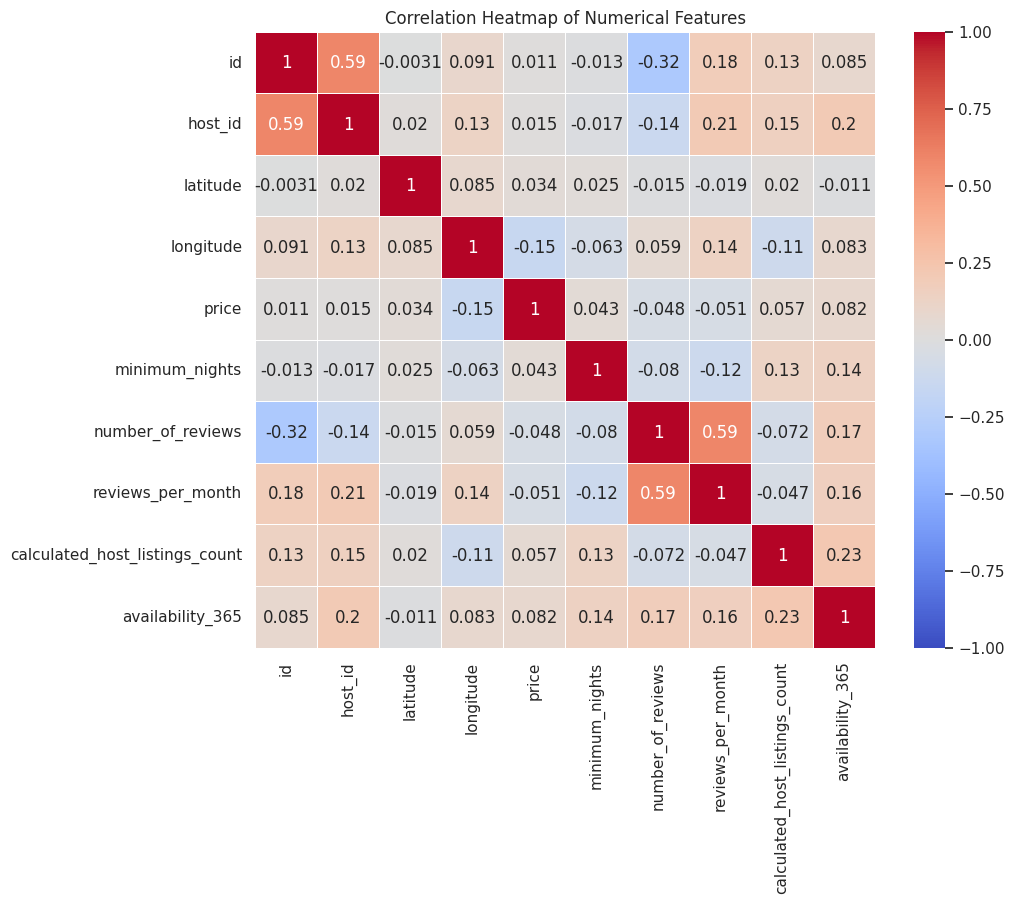

In [87]:
# Select numerical columns
numerical_cols = airbnb.select_dtypes(include=['number'])

# Calculate correlations
correlation_matrix = numerical_cols.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

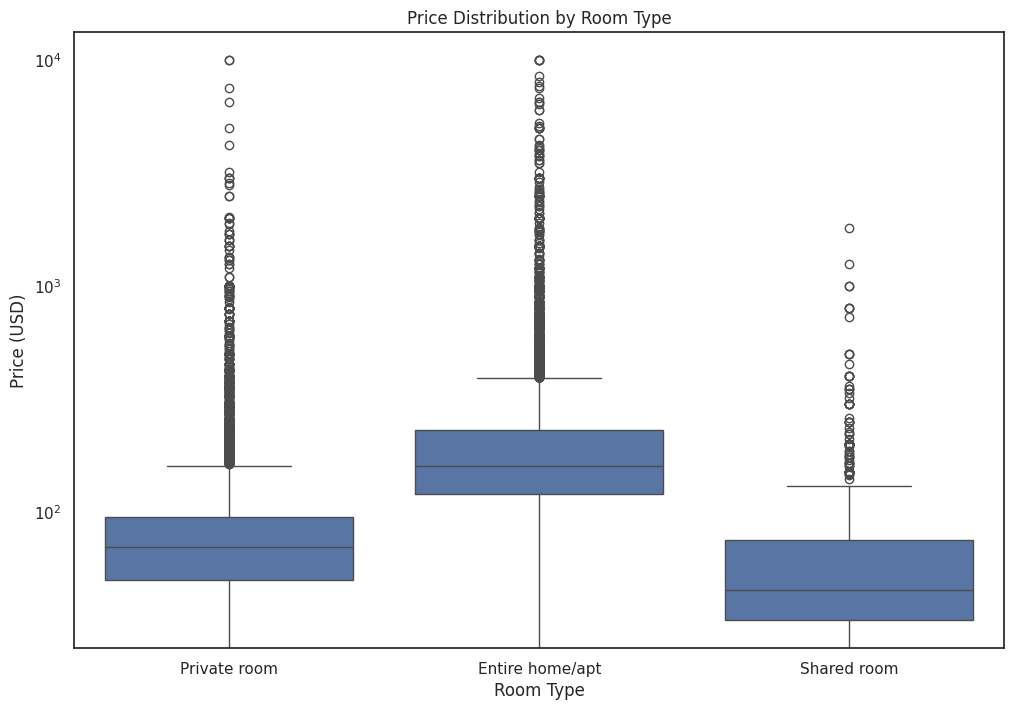

In [88]:
# Boxplot of price distribution by room type
plt.figure(figsize=(12, 8))
sns.boxplot(x='room_type', y='price', data=airbnb)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (USD)')
plt.yscale('log')  # Use logarithmic scale to better visualize the spread if there are outliers
plt.show()


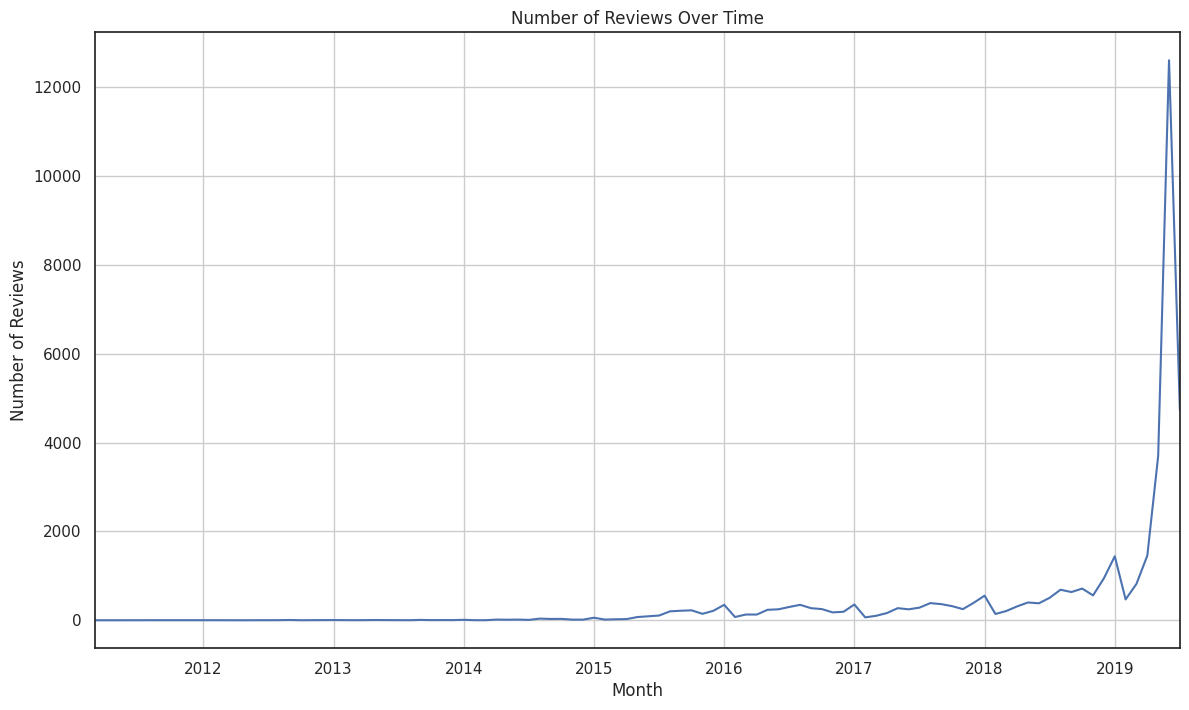

In [90]:

# Review Activity Over Time
# Convert the 'last_review' column to datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], errors='coerce')

# Group by month and year to get the number of reviews per month
reviews_over_time = airbnb['last_review'].dt.to_period('M').value_counts().sort_index()

# Plotting the review activity over time
plt.figure(figsize=(14, 8))
reviews_over_time.plot(kind='line')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

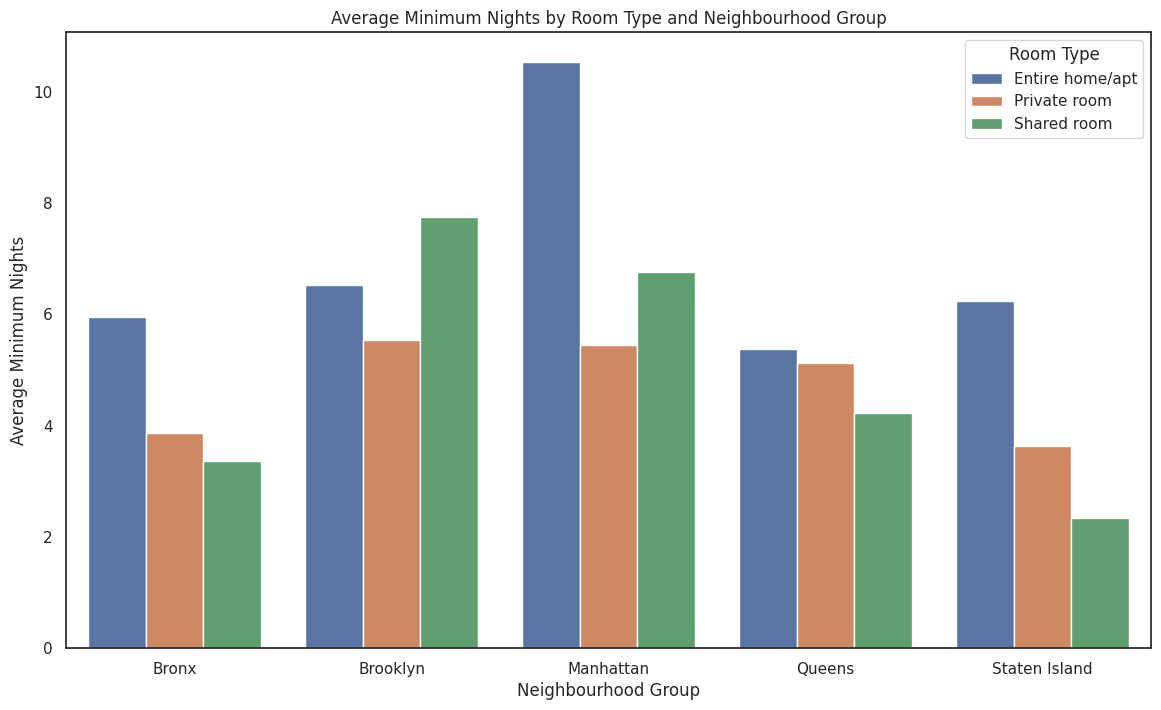

In [91]:
# Average Minimum Nights by Room Type and Neighborhood Group
avg_min_nights = airbnb.groupby(['neighbourhood_group', 'room_type'])['minimum_nights'].mean().reset_index()

# Plotting the average minimum nights by room type and neighbourhood group
plt.figure(figsize=(14, 8))
sns.barplot(x='neighbourhood_group', y='minimum_nights', hue='room_type', data=avg_min_nights)
plt.title('Average Minimum Nights by Room Type and Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Minimum Nights')
plt.legend(title='Room Type')
plt.show()

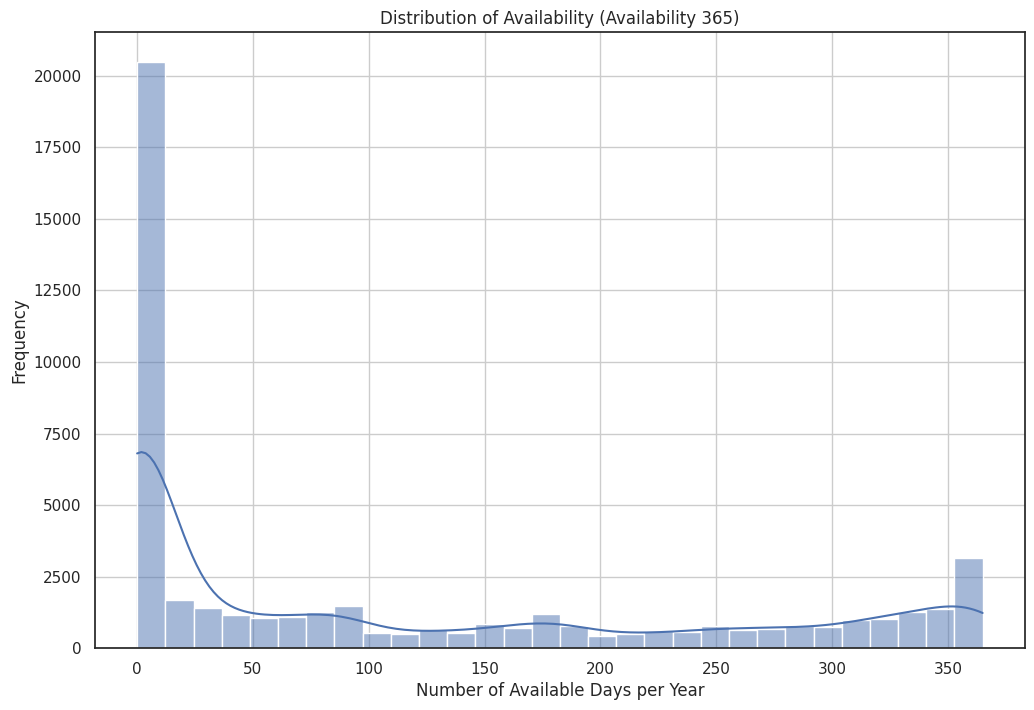

In [92]:
# Distribution of Availability (Availability_365)
plt.figure(figsize=(12, 8))
sns.histplot(airbnb['availability_365'], bins=30, kde=True)
plt.title('Distribution of Availability (Availability 365)')
plt.xlabel('Number of Available Days per Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

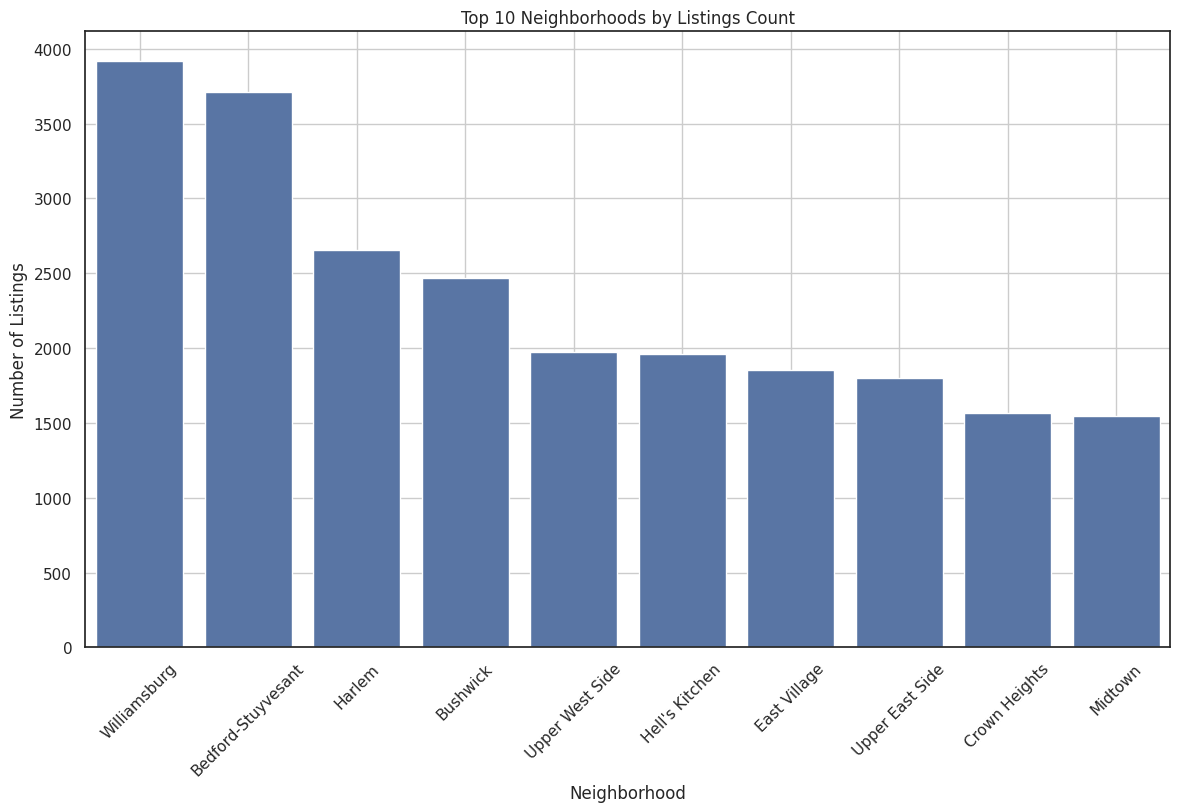

In [93]:
# Top 10 Neighborhoods by Listings Count
neighborhood_counts = airbnb['neighbourhood'].value_counts().head(10)

# Plotting the top 10 neighborhoods by listings count
plt.figure(figsize=(14, 8))
sns.barplot(x=neighborhood_counts.index, y=neighborhood_counts.values)
plt.title('Top 10 Neighborhoods by Listings Count')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

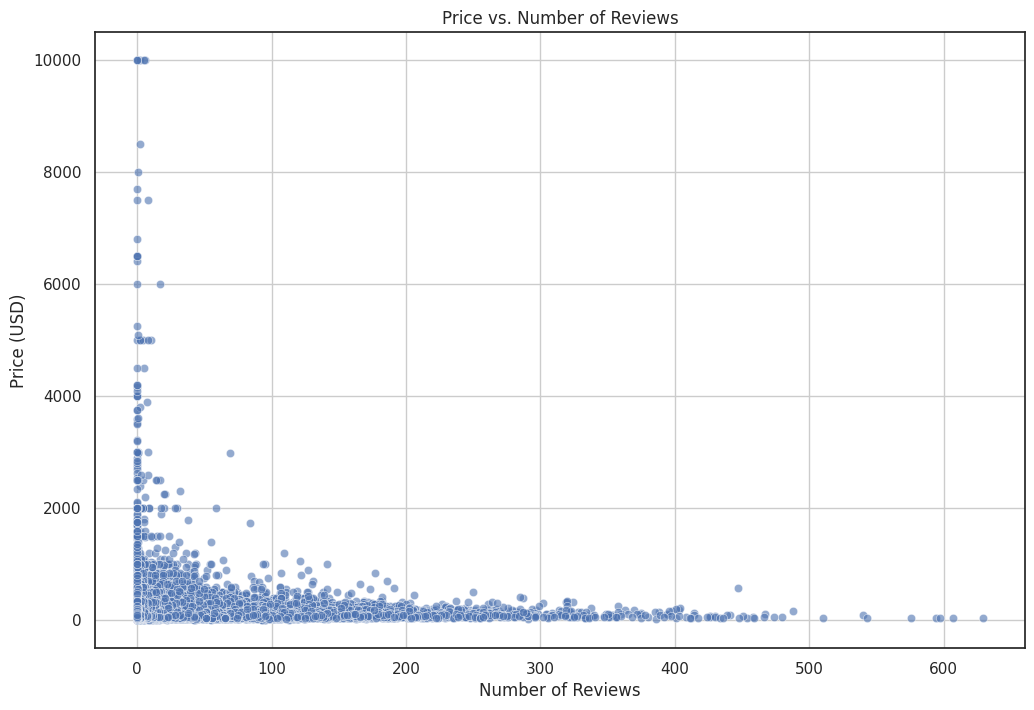

In [94]:
# Price vs. Number of Reviews
plt.figure(figsize=(12, 8))
sns.scatterplot(x='number_of_reviews', y='price', data=airbnb, alpha=0.6)
plt.title('Price vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

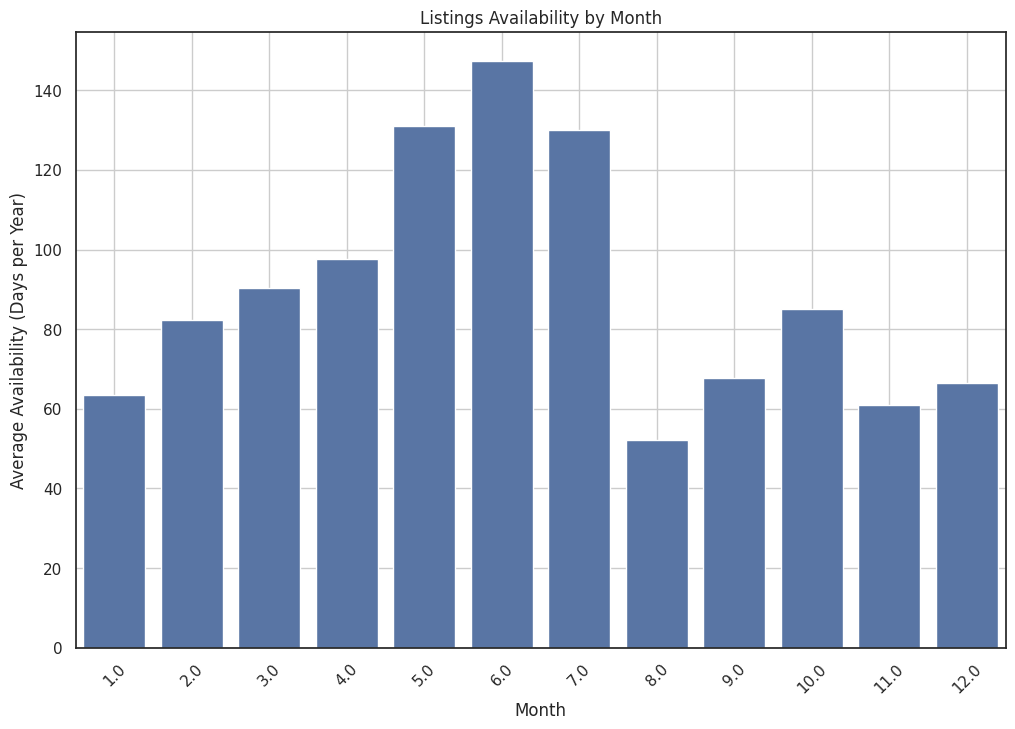

In [95]:
# # Plotting listings per room type
plt.figure(figsize=(12, 8))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Listings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()
# Convert the 'last_review' column to datetime
airbnb['last_review'] = pd.to_datetime(airbnb['last_review'], errors='coerce')

# Extract month from 'last_review' and count availability by month
airbnb['month'] = airbnb['last_review'].dt.month
availability_by_month = airbnb.groupby('month')['availability_365'].mean().reset_index()

# Plotting the availability by month
plt.figure(figsize=(12, 8))
sns.barplot(x='month', y='availability_365', data=availability_by_month)
plt.title('Listings Availability by Month')
plt.xlabel('Month')
plt.ylabel('Average Availability (Days per Year)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

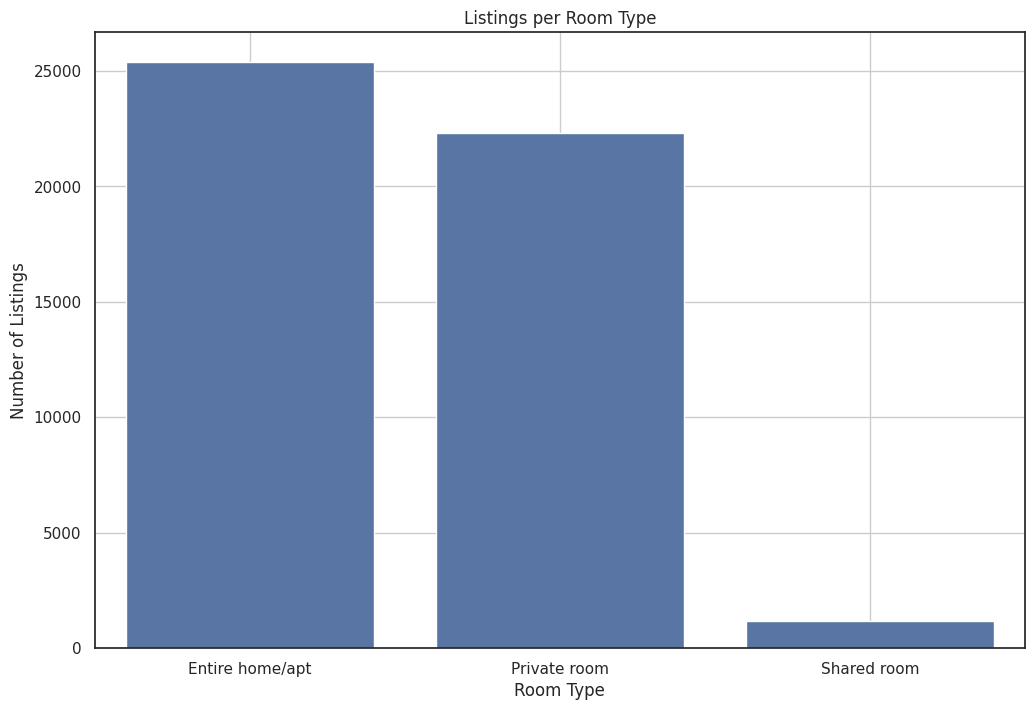

In [97]:
# Listings per Room Type
room_type_counts = airbnb['room_type'].value_counts()

# Plotting listings per room type
plt.figure(figsize=(12, 8))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Listings per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.show()


<Figure size 1200x800 with 0 Axes>

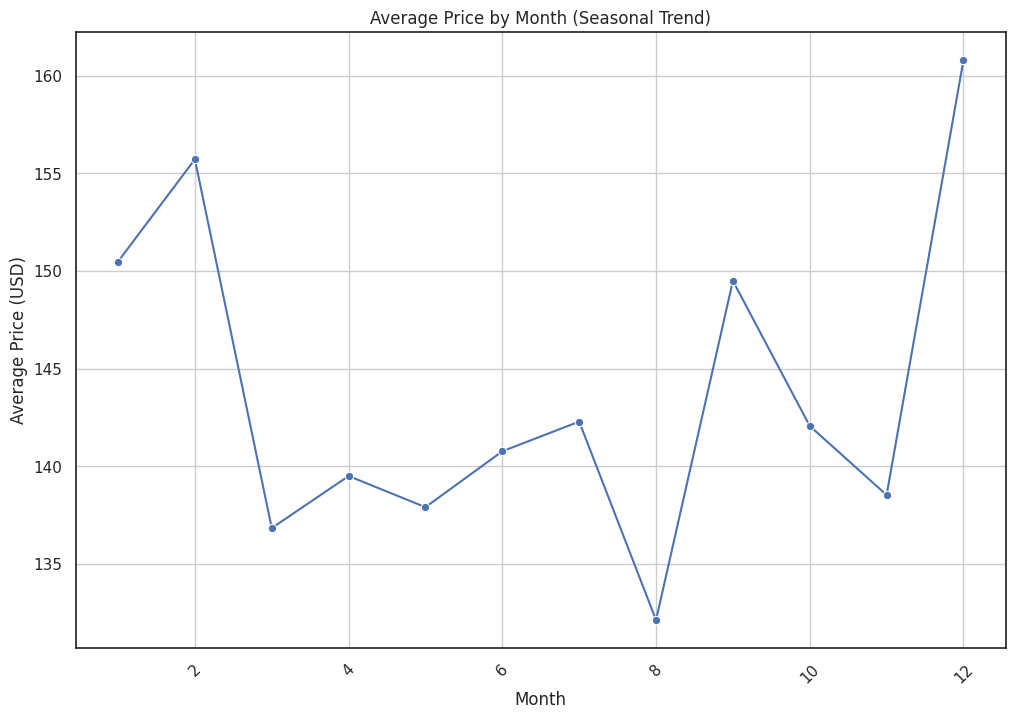

In [99]:
# Average Price by Month (Seasonal Trend)
airbnb['month'] = airbnb['last_review'].dt.month
avg_price_by_month = airbnb.groupby('month')['price'].mean().reset_index()

# Plotting average price by month
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='price', data=avg_price_by_month, marker='o')
plt.title('Average Price by Month (Seasonal Trend)')
plt.xlabel('Month')
plt.ylabel('Average Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipykernel_3203/3494770509.py:3: FutureWarning: The provided callable <function median at 0x7d3af49558a0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  result = airbnb.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')


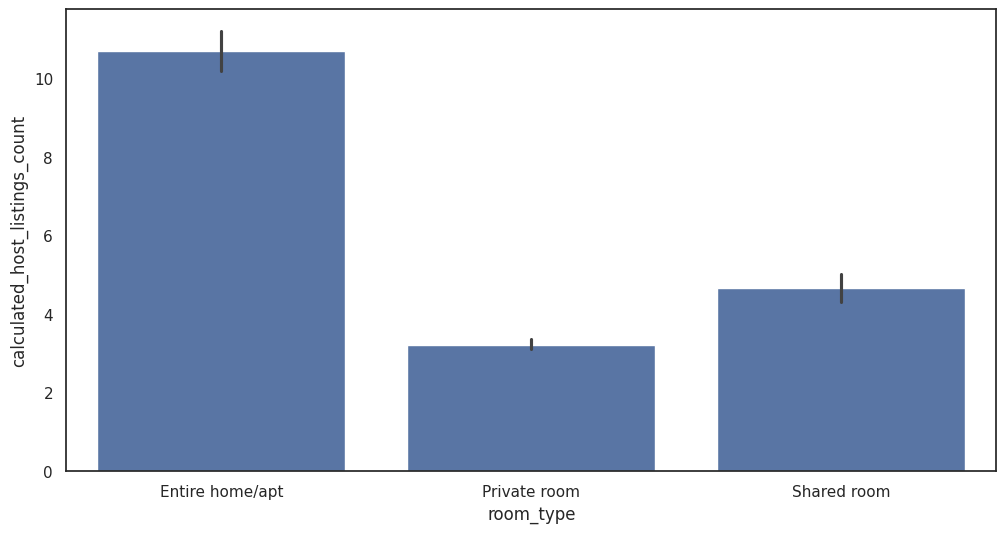

In [100]:
plt.figure(figsize=(12,6))

result = airbnb.groupby(["room_type"])['calculated_host_listings_count'].aggregate(np.median).reset_index().sort_values('calculated_host_listings_count')

sns.barplot(x='room_type', y="calculated_host_listings_count", data=airbnb, order=result['room_type'])

plt.show()

# Data Preparation